In [1]:
from ModelFactory import ModelFactory
import tensorflow as tf
#import tensorflow.keras.layers as layers
#import tensorflow.keras as keras
import os
import pickle
import numpy as np
import pylab as plt
import pandas as pd

# from utils import
import utils
from utils import tf_utils

#import tf_utils as tf_utils
#import plotting_utils

from features import select_features, DEFAULT_FEATURES

import inspect

# from copy import deepcopy

from defaults import *



model_names = [ #"model_673f998e",    # --remove feature n_photons
                #"gen2filt_hasgamma",
                #"gen2filt_allfeatures_hypertuned",
                #"gen2filt_hypertuned",
                "model_noweights_hyperband0_100epoch"
                
                # "gen2filt_weighted",
                # #"gen2filt_forpres",
                # "gen2filt_primary",
                # "gen2filt_primary_hypertuned",
                # "gen2filt_mubundle"
              ]
nominal_model = model_names[0]

mfs = {}
for model_name in model_names:
    mf = ModelFactory.load_model(model_name)
    mfs[model_name] = mf

mf = mfs[nominal_model]

2024-04-29 03:52:50.047974: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/navidkrad/work/i3kiss/utils/__init__.py:1: UserWarning: The recommended fonts to use plothist were not found. You can install them by typing 'install_latin_modern_fonts' in your terminal. 

  from utils.plotting_utils import *


ValueError: could not find model in path: /data/user/navidkrad/i3kiss/models/cascades_v0.1_L3/model_noweights_hyperband0_100epoch/model.keras

In [2]:

prediction_plot = os.path.join(mf.plot_dir, "predictions.png")
from plotting_utils import show_url
from IPython.display import Image
# from IPython.core.display import HTML 
Image(url=show_url(prediction_plot))

ModuleNotFoundError: No module named 'plotting_utils'

In [2]:
import utils as utils
from utils import tf_utils
import pandas as pd
import numpy as np
import pylab as plt
import matplotlib as mpl
from uncertainties import ufloat
import time

livetime = lambda w: w.sum()/(w*w).sum()
n_eff = lambda w: w.sum()*w.sum()/(w*w).sum()
rel_uncert = lambda w: np.sqrt( (w*w).sum() ) / w.sum()

def calc_livetime(df, query_or_mask=None, weight_col='weights', return_dict=False):
    if query_or_mask:
        if isinstance(query_or_mask, str):
            df = df.query(query_or_mask)
        elif query_or_mask.dtype == bool:
            df = df[query_or_mask]
        else:
            df = df.loc[query_or_mask]
    if weight_col and weight_col in df:
        w = df[weight_col]
    else:
        w = df
        
    R = w.sum()
    DeltaR2 = (w*w).sum()
    livetime = R/DeltaR2
    DeltaR = np.sqrt(DeltaR2)
    uncert = DeltaR/R
    ret_dict = dict(R=R, DeltaR2=DeltaR2, DeltaR=DeltaR, livetime=livetime, total_rate=ufloat(R, round(DeltaR,5)),
                    ulivetime=ufloat(livetime, round(uncert,5)) ,
                    N_eff=(R*R/DeltaR2),
                   )
    ret = livetime if not return_dict else ret_dict
    return ret


def get_weight_from_pred(pred):
    weights = 1.0/pred
    size = len(pred)
    rand = np.random.rand(size)
    mask =  rand < pred
    #print(weights.sum(), factor)
    return weights, mask
    

ImportError: cannot import name 'utils' from 'utils' (/home/navidkrad/work/i3kiss/utils/__init__.py)

In [3]:
df = mf.df_test.sample(100_000)


loading only 1 out of 1...
loading DF: ['/data/user/navidkrad/hdf/mcprimary_v0.17_dsfix/sim/IceCube/2020/CORSIKA-in-ice/20904/0009000-0009999/combined_preproc/combined_preproc_0009000-0009999_01_of_50.hdf5']:
       ['/data/user/navidkrad/hdf/mcprimary_v0.17_dsfix/sim/IceCube/2020/CORSIKA-in-ice/20904/0009000-0009999/combined_preproc/combined_preproc_0009000-0009999_01_of_50.hdf5']


In [5]:
# df[['energy', 'cos_zenith']].cov(), df[['energy', 'cos_zenith']].corr()

In [19]:
pred = mf.model.predict(df[mf.features], batch_size=mf.batch_size )
df['pred'] = pred

13/13 [==============================] - 1s 44ms/step


Text(0.0, 0.1, 'Average Precision: 0.348')

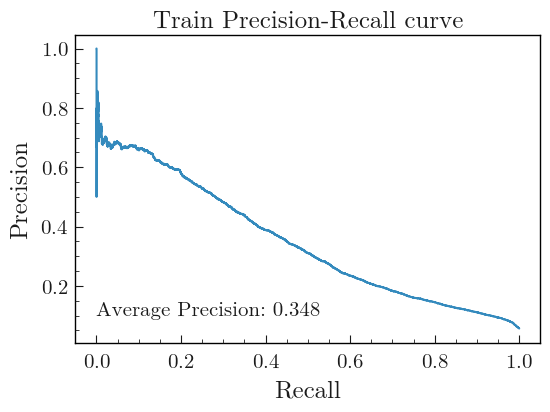

In [66]:
from sklearn.metrics import precision_recall_curve

y_truth = df[mf.labels]
y_pred = df['pred']
precision, recall, thresholds = precision_recall_curve(y_truth, y_pred )
ap = round(sklearn.metrics.average_precision_score(y_truth, y_pred),3)

plt.plot(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve")
plt.text(0., 0.1, f'Average Precision: {ap}')

In [61]:
import sklearn
sklearn.metrics.av
#sklearn.metrics.precision_score( df[mf.labels],  df['pred']>0.3  )
#df[mf.labels].value_counts()

0.10098488806331146

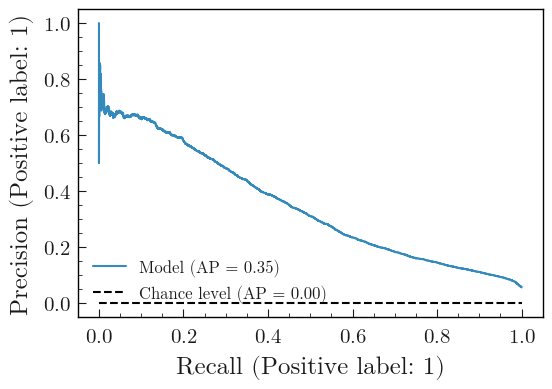

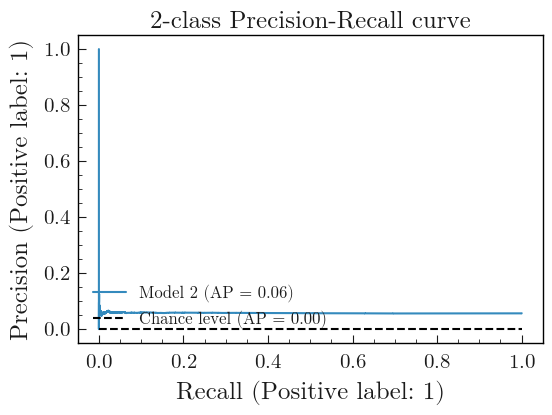

In [27]:
from sklearn.metrics import PrecisionRecallDisplay




display = PrecisionRecallDisplay.from_predictions(
    df[mf.labels], df['pred'], name="Model", plot_chance_level=True
)
display = PrecisionRecallDisplay.from_predictions(
    df[mf.labels], df['pred'].sample(frac=1), name="Model 2", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")



In [6]:
preds = {}
for model_name in model_names:
    print(model_name)
    print(mf.features)
    mf_ = mfs[model_name]
    pred = mf_.model.predict(df[mf_.features], batch_size=mf_.batch_size)
    #preds[model_name] = pred
    df[model_name] = pred

#df['pred'] = pred
df['truth'] = df['filtered']

gen2filt_allfeatures_hypertuned
['log_z', 'log_rho', 'log_length', 'log_energy', 'interaction_height', 'cos_zenith', 'pdg_map', 'energy_per_nucleus', 'depth', 'multiplicity', 'mu_radius_mean', 'mu_radius_std', 'mu_radius_min', 'mu_radius_max', 'mu_log_energy_mean', 'mu_log_energy_std', 'mu_log_energy_min', 'mu_log_energy_max', 'mu1_radius', 'mu2_radius', 'mu3_radius', 'mu4_radius', 'mu5_radius', 'mu6_radius', 'mu7_radius', 'mu8_radius', 'mu9_radius', 'mu10_radius', 'mu1_log_energy', 'mu2_log_energy', 'mu3_log_energy', 'mu4_log_energy', 'mu5_log_energy', 'mu6_log_energy', 'mu7_log_energy', 'mu8_log_energy', 'mu9_log_energy', 'mu10_log_energy']
13/13 [==============================] - 1s 14ms/step
gen2filt_hypertuned
['log_z', 'log_rho', 'log_length', 'log_energy', 'interaction_height', 'cos_zenith', 'pdg_map', 'energy_per_nucleus', 'depth', 'multiplicity', 'mu_radius_mean', 'mu_radius_std', 'mu_radius_min', 'mu_radius_max', 'mu_log_energy_mean', 'mu_log_energy_std', 'mu_log_energy_min',

In [7]:

df_pos = df.query('filtered==1')
n_pos = len(df_pos)
df_neg = df.query('filtered==0')
n_neg = len(df_neg)

passed = df.filtered==1

In [8]:
(df['n_photons']==0).value_counts()

n_photons
True     66631
False    33369
Name: count, dtype: int64

1852 98148
98.9907005981184 99.00000000000006


/tmp/ipykernel_2132/3180272882.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, ax.get_ylim()[1]*10 )


(0.5740467496625368, 1153738.7858904253)

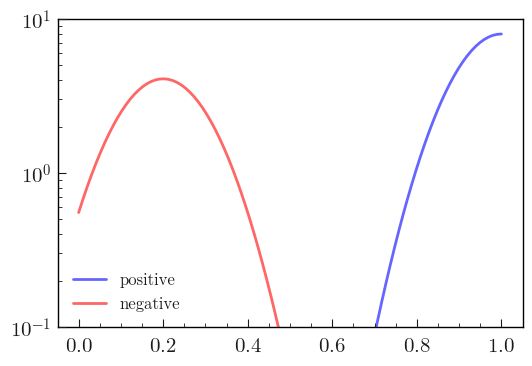

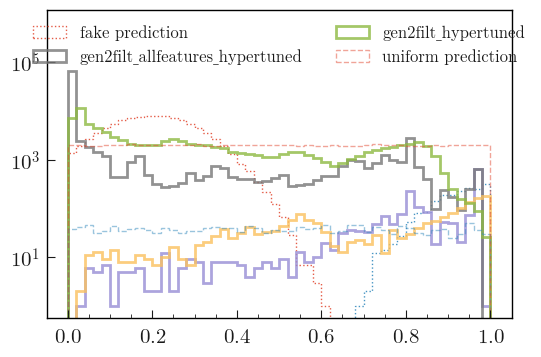

In [9]:
"""
    create a "fake prediction" based on truth info
"""


print(n_pos, n_neg)


from scipy.stats import truncnorm
x = np.linspace(0,1)

fig, ax = plt.subplots()


beta = 0.5
m = 10
loc = 1
scale = 1

# pdf_pos = truncnorm(0,1,0,1)
# ax.plot(x, pdf_pos.pdf(x),
#        'b-', lw=2, alpha=0.6, label='positive')

def truncnorm_wrapper(a_trunc, b_trunc, loc, scale):
    a, b = (a_trunc - loc) / scale, (b_trunc - loc) / scale
    return truncnorm(a, b, loc, scale)

x = np.linspace(0,1,100)


pdf_pos = truncnorm_wrapper(0, 1, loc=1, scale=0.1)
ax.plot(x, pdf_pos.pdf(x),
       'b-', lw=2, alpha=0.6, label='positive')


pdf_neg = truncnorm_wrapper(0, 1,loc=0.2, scale=0.1 )

ax.plot(x, pdf_neg.pdf(x),
       'r-', lw=2, alpha=0.6, label='negative')

#ax.set_xlim(-1,2)
ax.set_ylim(1E-1,10)
ax.set_yscale('log')
ax.legend()
print(np.trapz(pdf_neg.pdf(x)), np.trapz(pdf_pos.pdf(x)))



df_pos['fake_pred'] = pdf_pos.rvs(len(df_pos))
df_neg['fake_pred'] = pdf_neg.rvs(len(df_neg))

df.loc[df.filtered==1,'fake_pred'] = pdf_pos.rvs(sum(df.filtered==1))
df.loc[df.filtered==0,'fake_pred'] = pdf_neg.rvs(sum(df.filtered==0))

df.loc[df.filtered==1,'uniform_pred'] = np.random.rand(sum(df.filtered==1))
df.loc[df.filtered==0,'uniform_pred'] = np.random.rand(sum(df.filtered==0))

df.loc[df.filtered==1,'coin_toss'] = 0.5
df.loc[df.filtered==0,'coin_toss'] = 0.5


hkw = dict(histtype='step', bins=50, range=(0,1))


fig, ax = plt.subplots()
_ = ax.hist(df.query('filtered==1')['fake_pred'], **hkw , alpha=0.9, ls=':')
_ = ax.hist(df.query('filtered==0')['fake_pred'], **hkw, label='fake prediction', alpha=0.9, ls=':')


for model_name in model_names:
    _ = ax.hist(df.query('filtered==1')[model_name], **hkw, lw=2, alpha=0.8, )
    _ = ax.hist(df.query('filtered==0')[model_name], **hkw, lw=2, alpha=0.8, label=model_name)


_ = ax.hist(df.query('filtered==1')['uniform_pred'], **hkw, color='C0', lw=1,ls='--', alpha=0.5)
_ = ax.hist(df.query('filtered==0')['uniform_pred'], **hkw, color='C1', lw=1, ls='--', alpha=0.5, label='uniform prediction')
ax.legend(loc='upper center', ncol=2)
ax.set_yscale('log')
ax.set_ylim(0, ax.get_ylim()[1]*10 )



In [10]:
plot_dir = "/data/user/navidkrad/plots/pres/feb2024"

labels = {
    'n_photons_passed'    : r'$N_{positive}^{\gamma}$',
    'n_photons_simulated' : r'$N_{accepted}^{\gamma}$',
    'n_events_eff'     : r'$N^{accepted}_{eff} (pred*gen weights)$',
    'n_events_eff_pred'     : r'$N^{positive}_{eff}$',    
    'n_events_eff_gen'     : r'$N^{positive}_{eff} (gen weight)$',    
    'n_events_simulated'  : r'$N^{accepted}_{events}$',

    
    
    #'min_pred':'Rejection Probability Threshold',
    'min_pred':'Minimum Acceptance Probability',

    #'fake_pred':'Utopian',
    'fake_pred':'Ideal',
    'pred':'model',
    #'uniform_pred':'Dystopian', 
    'uniform_pred':'Uniform', 
}

colors = {
    'fake_pred': 'green',
    'uniform_pred': 'red',
    'pred': 'blue'
}


infos = {
    'fake_pred': dict(color='green', label="Ideal", ls=':', lw=2),
    'uniform_pred': dict(color='red', label="Uniform", ls=':' , lw=2),
    #'pred': dict(color='blue', label='model'),
    'gen2filt_hypertuned': dict(color='blue', label='Model')
}
from copy import deepcopy
def plot_nom_denom_ratio(axs, sdf, nom, denom, x="min_pred", label=None, norm_idx=-1):
    ax = axs[0]
    nom_label = labels.get(nom, nom)
    x_label = labels.get(x,x)
    #ls = None if label in ['pred'] else '--'
    #ls = '--'
    #color = colors.get(label,None)
    plot_kw = deepcopy(infos.get(label, {}))
    plot_kw.setdefault("alpha",0.8)
    plot_kw.setdefault("ls", None)
    plot_kw.setdefault("lw", 2)
    
    label = plot_kw.pop('label', label)
    
    ax.plot( sdf[x], sdf[nom], **plot_kw)
    ax.set_xlabel(x_label)
    ax.set_ylabel(nom_label)
    
    ax = axs[1]
    denom_label = labels.get(denom, denom)
    ax.plot( sdf[x], sdf[denom], **plot_kw)
    ax.set_ylabel(denom_label)
    ax.set_xlabel(x_label)
    
    ax = axs[2]
    #x = 'min_pred'
    #y = 'n_events_eff'
    y = (sdf[nom]/sdf[denom]) 
    if not norm_idx is None:
        y /= (sdf[nom].iloc[norm_idx]/sdf[denom].iloc[norm_idx])
    ax.plot( sdf[x], y , label=label, **plot_kw)
    ax.set_ylabel(r"%s/%s"%(nom_label, denom_label))
    ax.set_xlabel(x_label, )
    return fig, axs

def make_tri_plot(nom, denom, x='min_pred', sdfs=None, norm_idx=-1 ):
    model_names = list(sdfs)
    fig, axs = plt.subplots(ncols=3, nrows=1, squeeze=False, figsize=(15, 5) )
    fig.tight_layout(pad=3)
    axs = axs.flatten()
    for pred_name in model_names:
        sdf = sdfs[pred_name]
        plot_nom_denom_ratio(axs, sdf, nom, denom, x, label=pred_name, norm_idx=norm_idx )
    fig.legend(ncol=len(model_names), loc='upper center', prop={'size':19})
    return fig, axs


# fig, axs = make_tri_plot('n_events_eff_pred', 'n_events_simulated', sdfs=sdfs)
# utils.savefig(fig, os.path.join(plot_dir, "n_eff_pred.png") )


# fig, axs = make_tri_plot('n_photons_passed', 'n_photons_simulated', sdfs=sdfs)
# utils.savefig(fig, os.path.join(plot_dir, "n_photons_passed.png") )

In [11]:
mf.selection

In [12]:
model_names

['gen2filt_allfeatures_hypertuned', 'gen2filt_hypertuned']

In [13]:
"""
    set a minimum rejection probability by creating an "underflow" prediction bin
"""


query = None

if query:
    df_ = df.query(query)
else:
    df_ = df

w_gen = df_['weights']
n_photons = df_['n_photons']
passed = df_.filtered==1

calc_n_eff = lambda w: w.sum()**2/(w**2).sum()

sdfs = {}
for pred_name in ['fake_pred', 'uniform_pred', 'coin_toss' ] + model_names:
    print(pred_name)
    steps = []
    pred = df_[pred_name]
    for min_pred in np.linspace(0,1, 100):
        step_pred = np.where(pred<=min_pred, min_pred, pred )
        w_pred, mask_sample = get_weight_from_pred(step_pred)

        n_events_simulated = step_pred.sum() 
        
        w_passed_gen  = w_gen[mask_sample & passed]
        w_passed_pred = w_pred[mask_sample & passed]
        
        n_events_eff_gen = calc_n_eff(w_passed_gen)
        n_events_eff_pred = calc_n_eff(w_passed_pred)
        n_events_eff = calc_n_eff(w_passed_pred*w_passed_gen)
        
        n_photons_passed_raw = (n_photons)[mask_sample & passed].sum()
        n_photons_simulated_raw = (n_photons)[mask_sample].sum()

        n_photons_passed = (n_photons*w_gen)[mask_sample & passed].sum()
        n_photons_simulated = (n_photons*w_gen)[mask_sample].sum()

        
        steps.append(dict(min_pred=min_pred, 
                          n_events_eff_gen=n_events_eff_gen,
                          n_events_eff_pred=n_events_eff_pred,
                          n_events_eff=n_events_eff,
                          n_events_simulated=n_events_simulated,
                          n_photons_passed=n_photons_passed,
                          n_photons_simulated=n_photons_simulated,
                          n_photons_passed_raw=n_photons_passed_raw,
                          n_photons_simulated_raw=n_photons_simulated_raw,                          
                          #**di)
                         )
                    )

    
    sdf = pd.DataFrame(steps)
    sdfs[pred_name] = sdf

fake_pred
uniform_pred
coin_toss
gen2filt_allfeatures_hypertuned
gen2filt_hypertuned


/tmp/ipykernel_2132/3927319072.py:38: RuntimeWarning: divide by zero encountered in divide
  weights = 1.0/pred


{'dpi': 100, 'bbox_inches': 'tight'}
plot saved in: /data/user/navidkrad/plots/pres/feb2024/n_eff.png
directory /data/user/navidkrad/plots/pres/feb2024/n_eff.png --> 
https://convey.icecube.wisc.edu/data/user/navidkrad/plots/pres/feb2024/n_eff.png
{'dpi': 100, 'bbox_inches': 'tight'}
plot saved in: /data/user/navidkrad/plots/pres/feb2024/n_eff_pred.png
directory /data/user/navidkrad/plots/pres/feb2024/n_eff_pred.png --> 
https://convey.icecube.wisc.edu/data/user/navidkrad/plots/pres/feb2024/n_eff_pred.png
{'dpi': 100, 'bbox_inches': 'tight'}
plot saved in: /data/user/navidkrad/plots/pres/feb2024/n_eff_gen.png
directory /data/user/navidkrad/plots/pres/feb2024/n_eff_gen.png --> 
https://convey.icecube.wisc.edu/data/user/navidkrad/plots/pres/feb2024/n_eff_gen.png
{'dpi': 100, 'bbox_inches': 'tight'}
plot saved in: /data/user/navidkrad/plots/pres/feb2024/n_photons_passed.png
directory /data/user/navidkrad/plots/pres/feb2024/n_photons_passed.png --> 
https://convey.icecube.wisc.edu/data/use

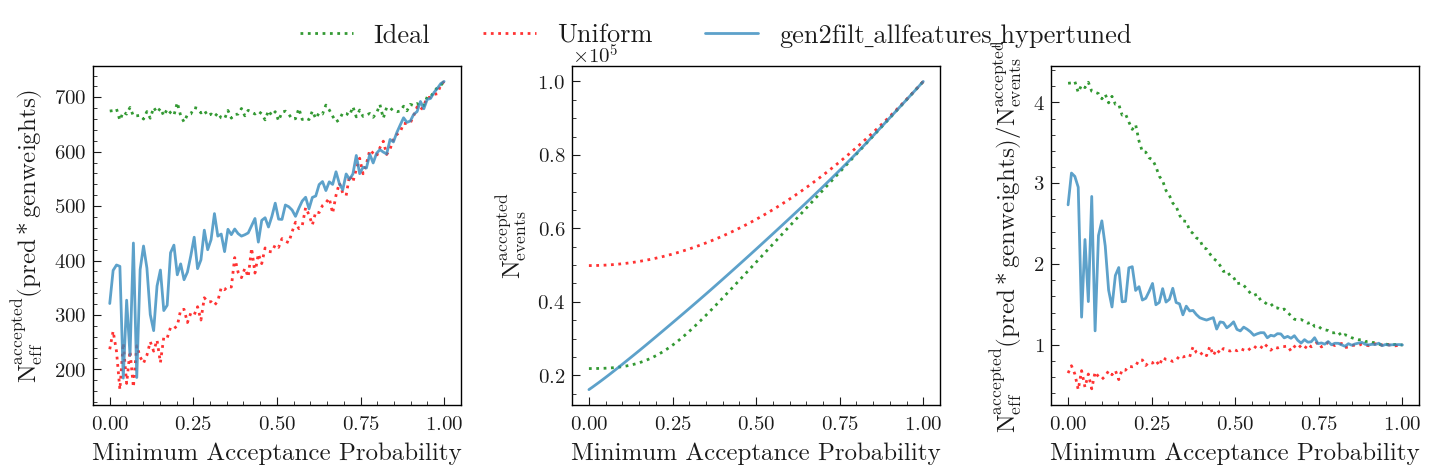

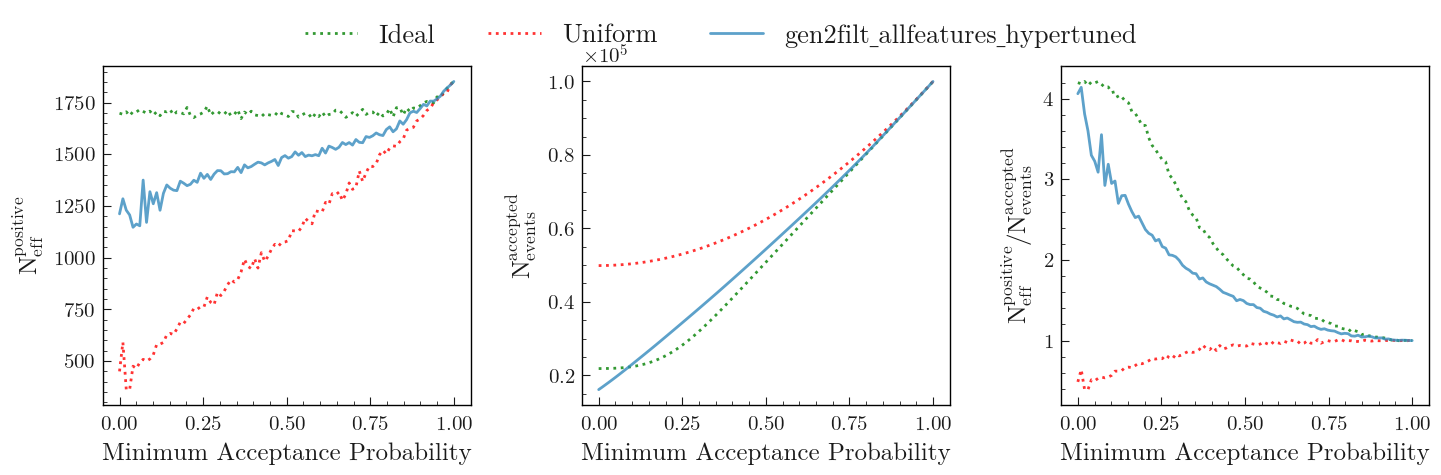

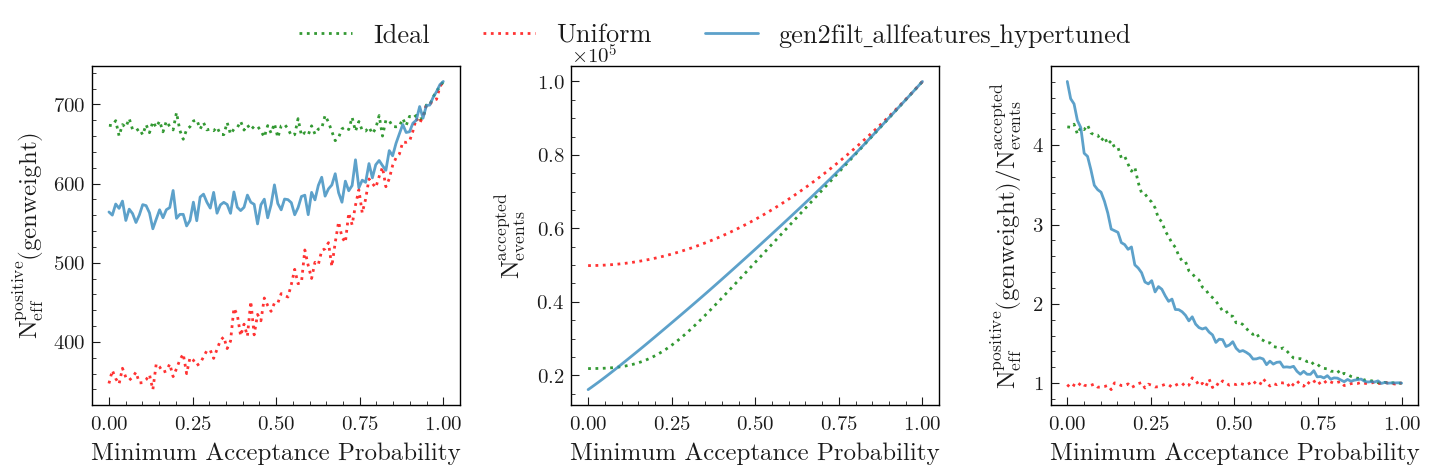

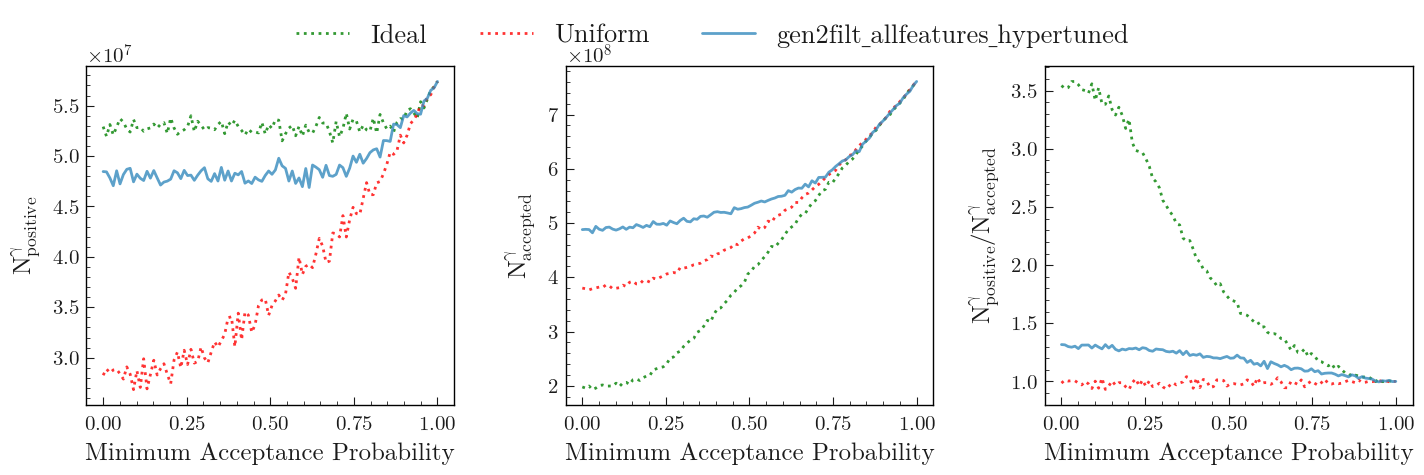

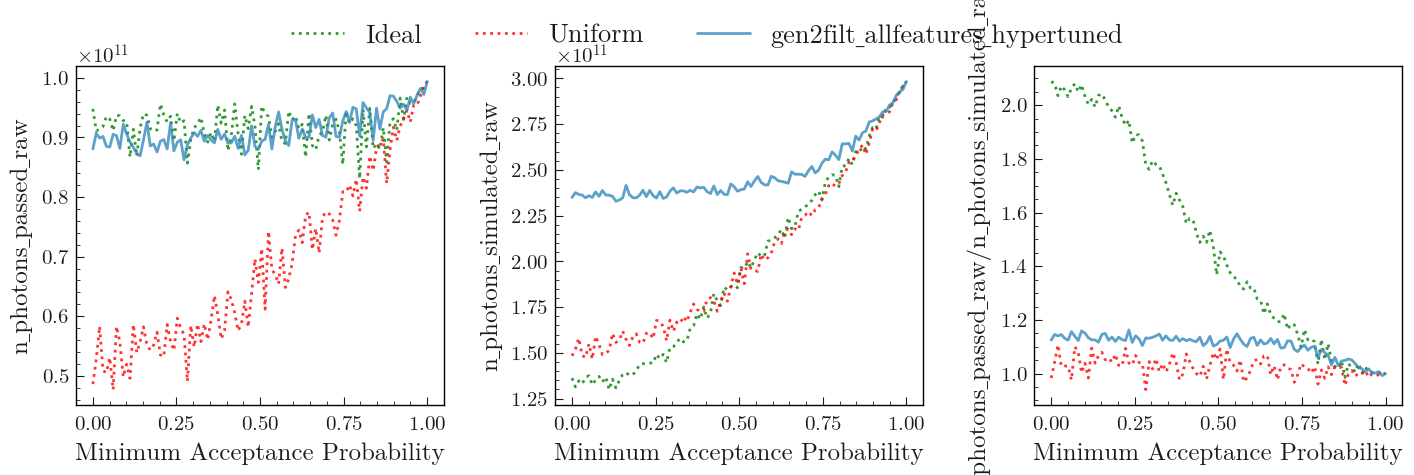

In [14]:

model_names_ = ['fake_pred', 'uniform_pred', 'gen2filt_allfeatures_hypertuned', ] # + ['coin_toss']
sdfs = {k:sdfs[k] for k in model_names_}
#model_names_ = ['fake_pred', 'uniform_pred', 'pred']

fig, axs = make_tri_plot('n_events_eff', 'n_events_simulated', sdfs=sdfs)
utils.savefig(fig, os.path.join(plot_dir, "n_eff.png") )

fig, axs = make_tri_plot('n_events_eff_pred', 'n_events_simulated', sdfs=sdfs)
utils.savefig(fig, os.path.join(plot_dir, "n_eff_pred.png") )
fig, axs = make_tri_plot('n_events_eff_gen', 'n_events_simulated', sdfs=sdfs)
utils.savefig(fig, os.path.join(plot_dir, "n_eff_gen.png") )


fig, axs = make_tri_plot('n_photons_passed', 'n_photons_simulated', sdfs=sdfs)
utils.savefig(fig, os.path.join(plot_dir, "n_photons_passed.png") )


fig, axs = make_tri_plot('n_photons_passed_raw', 'n_photons_simulated_raw', sdfs=sdfs)
utils.savefig(fig, os.path.join(plot_dir, "n_photons_passed_raw.png") )



{'dpi': 100, 'bbox_inches': 'tight'}
plot saved in: /data/user/navidkrad/plots/pres/feb2024/n_eff.png
directory /data/user/navidkrad/plots/pres/feb2024/n_eff.png --> 
https://convey.icecube.wisc.edu/data/user/navidkrad/plots/pres/feb2024/n_eff.png
{'dpi': 100, 'bbox_inches': 'tight'}
plot saved in: /data/user/navidkrad/plots/pres/feb2024/n_eff_pred.png
directory /data/user/navidkrad/plots/pres/feb2024/n_eff_pred.png --> 
https://convey.icecube.wisc.edu/data/user/navidkrad/plots/pres/feb2024/n_eff_pred.png
{'dpi': 100, 'bbox_inches': 'tight'}
plot saved in: /data/user/navidkrad/plots/pres/feb2024/n_eff_gen.png
directory /data/user/navidkrad/plots/pres/feb2024/n_eff_gen.png --> 
https://convey.icecube.wisc.edu/data/user/navidkrad/plots/pres/feb2024/n_eff_gen.png
{'dpi': 100, 'bbox_inches': 'tight'}
plot saved in: /data/user/navidkrad/plots/pres/feb2024/n_photons_passed.png
directory /data/user/navidkrad/plots/pres/feb2024/n_photons_passed.png --> 
https://convey.icecube.wisc.edu/data/use

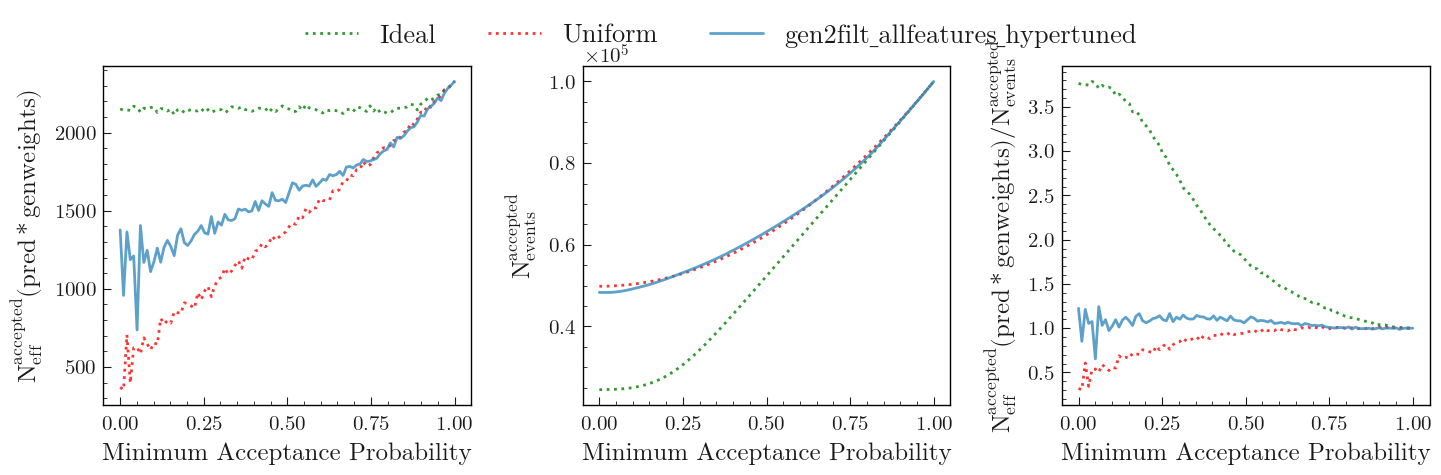

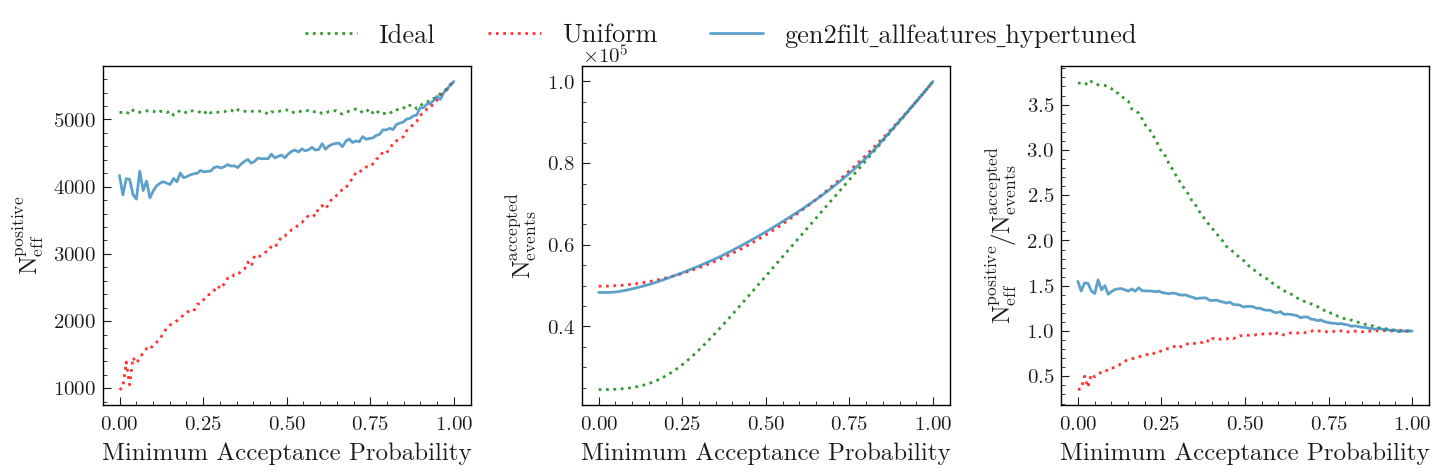

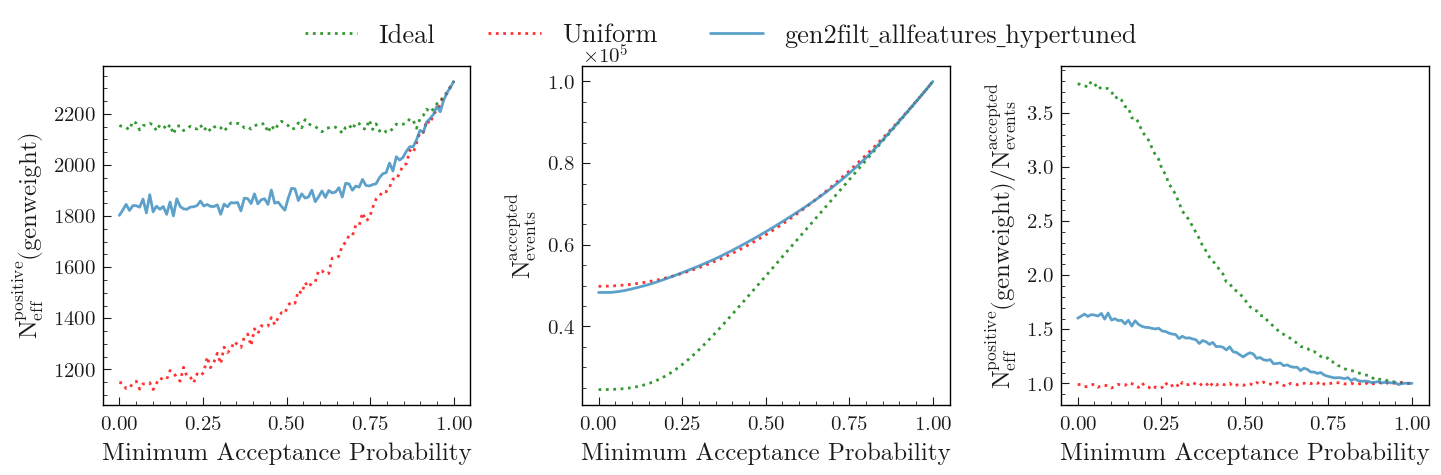

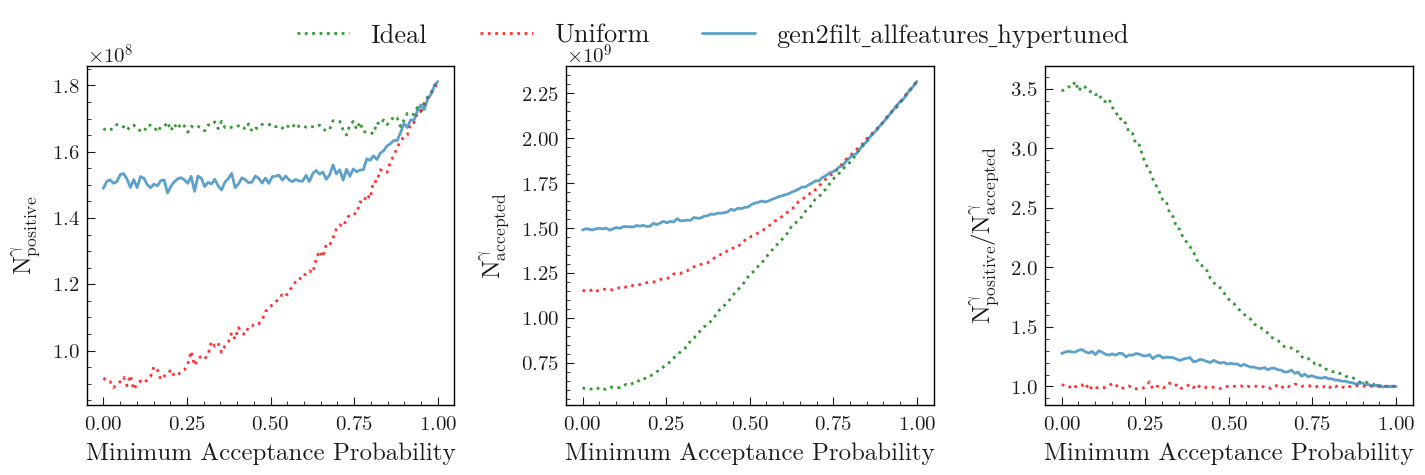

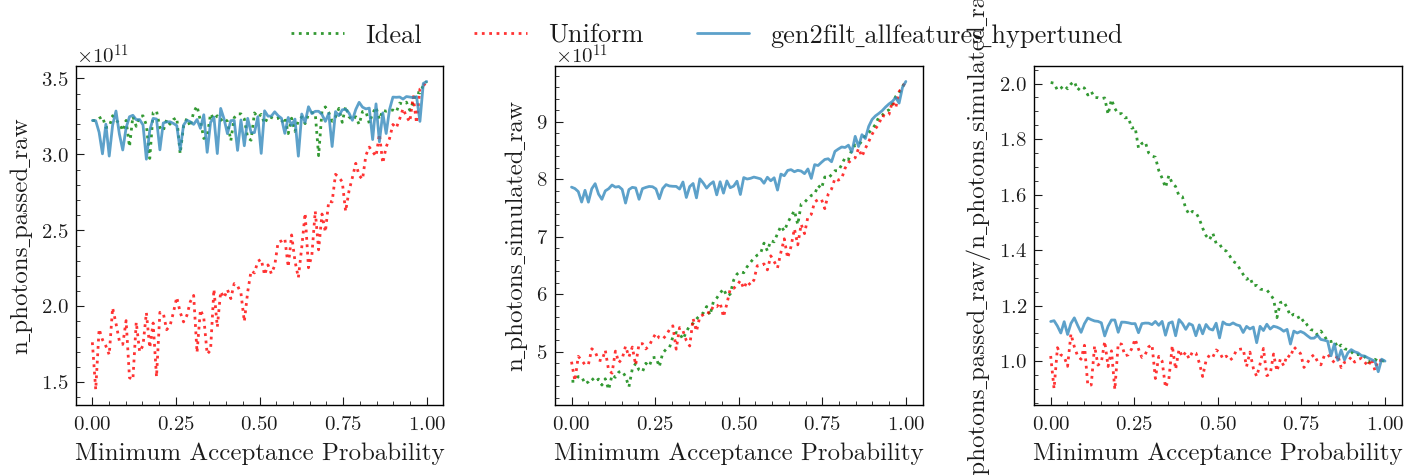

In [13]:

model_names_ = ['fake_pred', 'uniform_pred', 'gen2filt_allfeatures_hypertuned', ] # + ['coin_toss']
sdfs = {k:sdfs[k] for k in model_names_}
#model_names_ = ['fake_pred', 'uniform_pred', 'pred']

fig, axs = make_tri_plot('n_events_eff', 'n_events_simulated', sdfs=sdfs)
utils.savefig(fig, os.path.join(plot_dir, "n_eff.png") )

fig, axs = make_tri_plot('n_events_eff_pred', 'n_events_simulated', sdfs=sdfs)
utils.savefig(fig, os.path.join(plot_dir, "n_eff_pred.png") )
fig, axs = make_tri_plot('n_events_eff_gen', 'n_events_simulated', sdfs=sdfs)
utils.savefig(fig, os.path.join(plot_dir, "n_eff_gen.png") )


fig, axs = make_tri_plot('n_photons_passed', 'n_photons_simulated', sdfs=sdfs)
utils.savefig(fig, os.path.join(plot_dir, "n_photons_passed.png") )


fig, axs = make_tri_plot('n_photons_passed_raw', 'n_photons_simulated_raw', sdfs=sdfs)
utils.savefig(fig, os.path.join(plot_dir, "n_photons_passed_raw.png") )



{'dpi': 100, 'bbox_inches': 'tight'}
plot saved in: /data/user/navidkrad/plots/pres/feb2024/n_eff.png
directory /data/user/navidkrad/plots/pres/feb2024/n_eff.png --> 
https://convey.icecube.wisc.edu/data/user/navidkrad/plots/pres/feb2024/n_eff.png
{'dpi': 100, 'bbox_inches': 'tight'}
plot saved in: /data/user/navidkrad/plots/pres/feb2024/n_eff_pred.png
directory /data/user/navidkrad/plots/pres/feb2024/n_eff_pred.png --> 
https://convey.icecube.wisc.edu/data/user/navidkrad/plots/pres/feb2024/n_eff_pred.png
{'dpi': 100, 'bbox_inches': 'tight'}
plot saved in: /data/user/navidkrad/plots/pres/feb2024/n_eff_gen.png
directory /data/user/navidkrad/plots/pres/feb2024/n_eff_gen.png --> 
https://convey.icecube.wisc.edu/data/user/navidkrad/plots/pres/feb2024/n_eff_gen.png
{'dpi': 100, 'bbox_inches': 'tight'}
plot saved in: /data/user/navidkrad/plots/pres/feb2024/n_photons_passed.png
directory /data/user/navidkrad/plots/pres/feb2024/n_photons_passed.png --> 
https://convey.icecube.wisc.edu/data/use

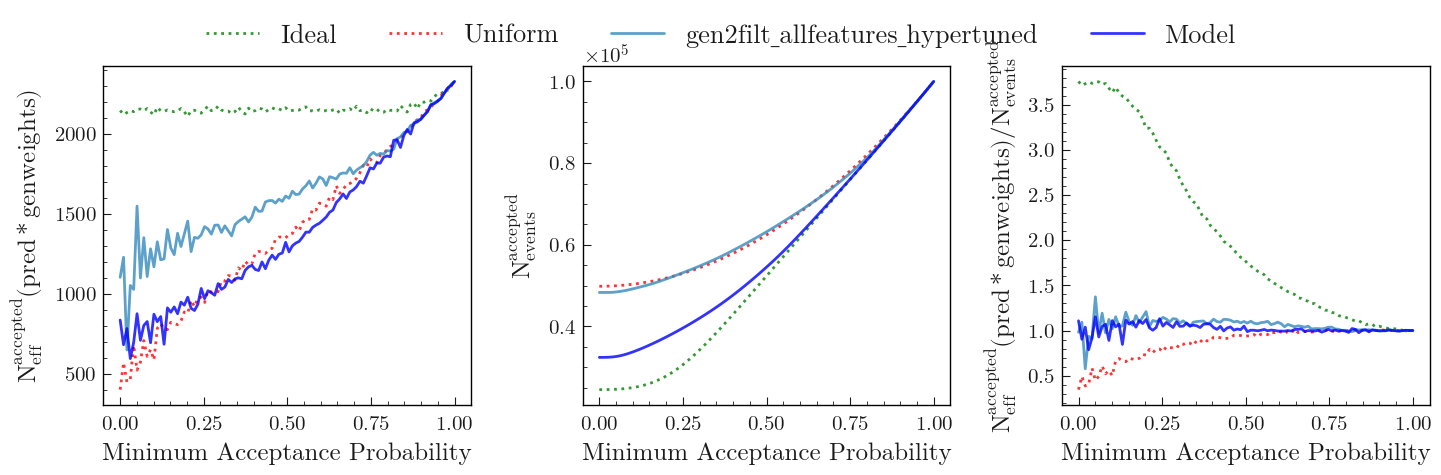

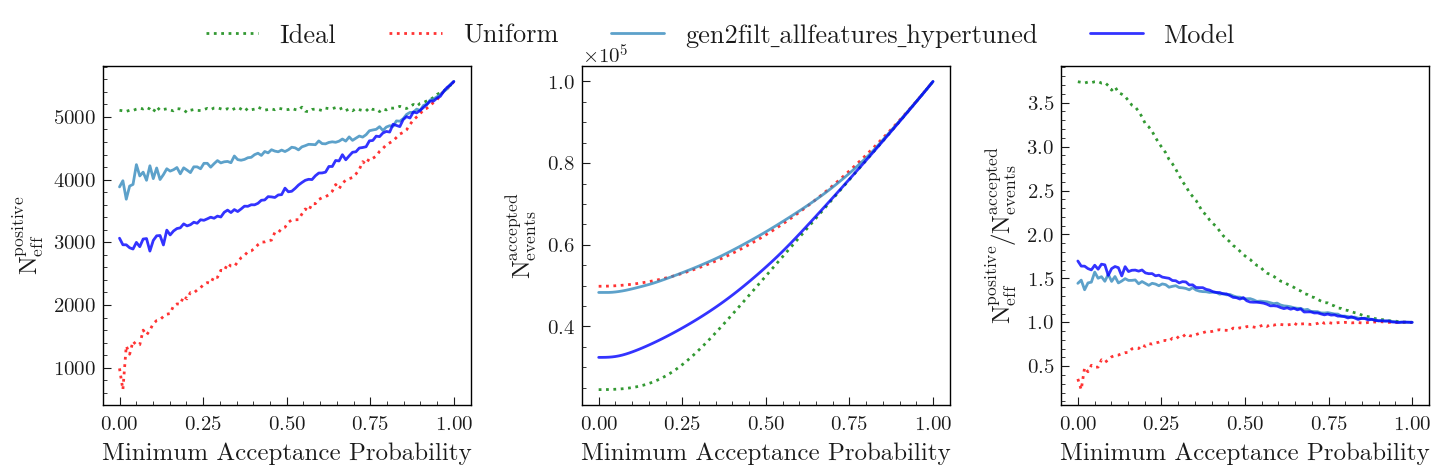

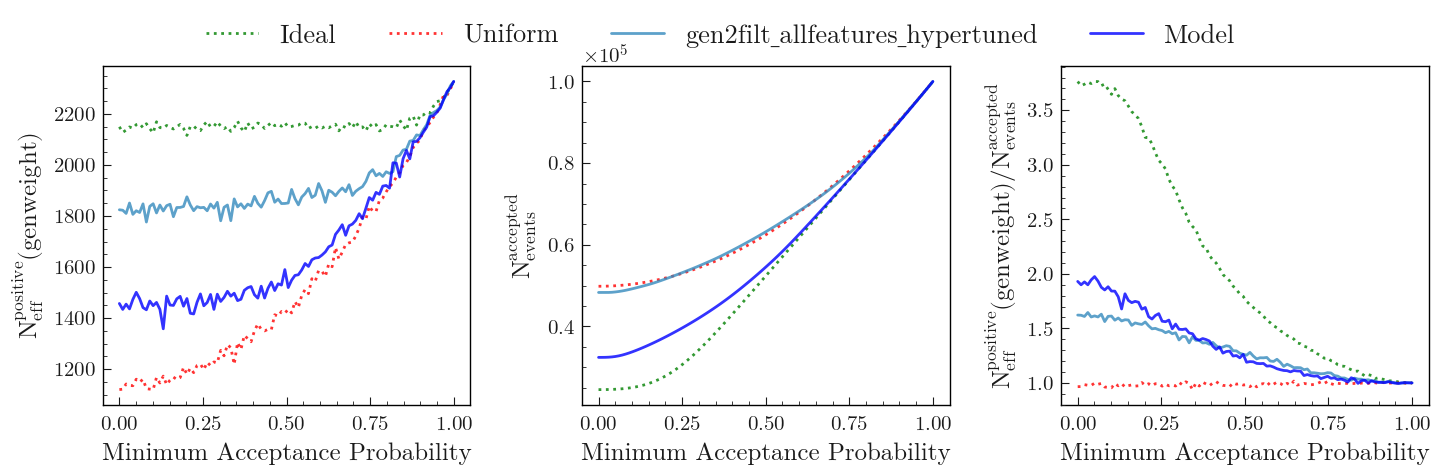

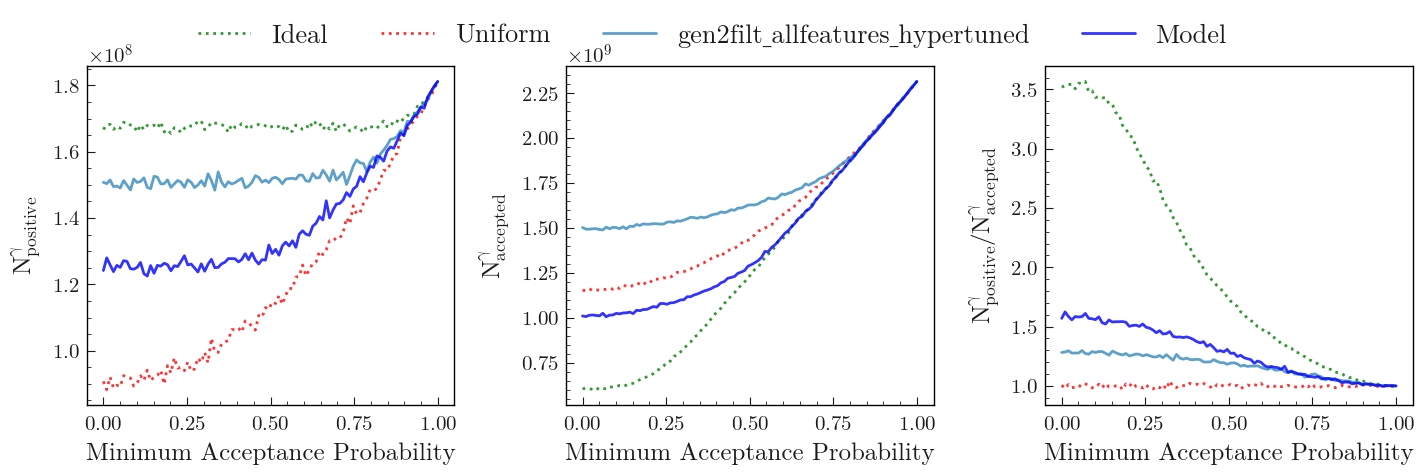

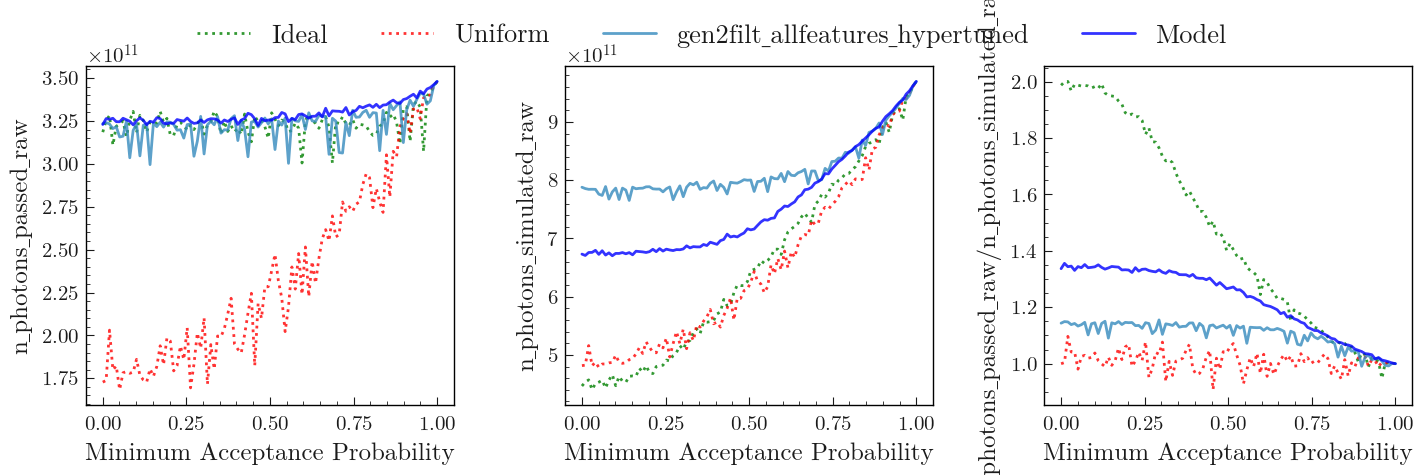

In [18]:

model_names_ = ['fake_pred', 'uniform_pred', 'gen2filt_allfeatures_hypertuned', 'gen2filt_hypertuned' ] # + ['coin_toss']
sdfs = {k:sdfs[k] for k in model_names_}
#model_names_ = ['fake_pred', 'uniform_pred', 'pred']

fig, axs = make_tri_plot('n_events_eff', 'n_events_simulated', sdfs=sdfs)
utils.savefig(fig, os.path.join(plot_dir, "n_eff.png") )

fig, axs = make_tri_plot('n_events_eff_pred', 'n_events_simulated', sdfs=sdfs)
utils.savefig(fig, os.path.join(plot_dir, "n_eff_pred.png") )
fig, axs = make_tri_plot('n_events_eff_gen', 'n_events_simulated', sdfs=sdfs)
utils.savefig(fig, os.path.join(plot_dir, "n_eff_gen.png") )


fig, axs = make_tri_plot('n_photons_passed', 'n_photons_simulated', sdfs=sdfs)
utils.savefig(fig, os.path.join(plot_dir, "n_photons_passed.png") )

fig, axs = make_tri_plot('n_photons_passed_raw', 'n_photons_simulated_raw', sdfs=sdfs)
utils.savefig(fig, os.path.join(plot_dir, "n_photons_passed_raw.png") )



In [19]:
mf.fname_test

'/data/user/navidkrad/hdf/mcprimary_v0.14_filterinfo/sim/IceCube/2020/CORSIKA-in-ice/20904/0001000-0001999/combined/combined_0001000-0001999_01_of_20.hdf5'

In [23]:
d = pd.read_hdf('/data/user/navidkrad/hdf/mcprimary_v0.14_filterinfo/sim/IceCube/2020/CORSIKA-in-ice/20904/0001000-0001999/combined/combined_0001000-0001999_01_of_20.hdf5', stop=100_000)



In [49]:
d['weights'].max()

0.04957968529422878

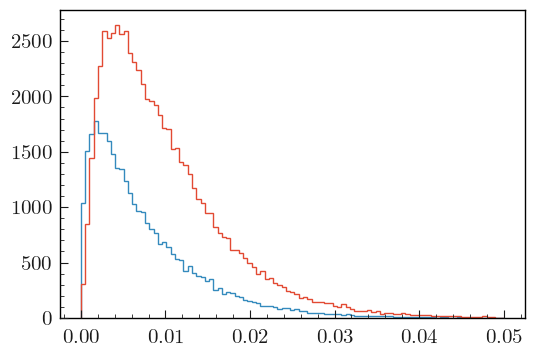

In [51]:
_ = plt.hist(d.query('n_photons>0')['weights'], bins=np.linspace(0,0.05,100), histtype='step' )
_ = plt.hist(d.query('n_photons==0')['weights'], bins=np.linspace(0,0.05,100), histtype='step' )


#plt.yscale('symlog')
#plt.xscale('log')
#plt.loglog()

In [11]:
"""
    set a minimum rejection probability by creating an "underflow" prediction bin
"""


query = None

if query:
    df_ = df.query(query)
else:
    df_ = df

w_gen = df_['weights']
n_photons = df_['n_photons']
passed = df_.filtered==1

calc_n_eff = lambda w: w.sum()**2/(w**2).sum()

sdfs = {}
for pred_name in ['fake_pred', 'uniform_pred', 'coin_toss' ] + model_names:                        
    steps = []
    pred = df_[pred_name]
    for max_pred in np.linspace(0,1, 100):
        step_pred = np.where(pred>=max_pred, max_pred, pred )
        w_pred, mask_sample = get_weight_from_pred(step_pred)

        n_events_simulated = step_pred.sum() 
        
        w_passed_gen  = w_gen[mask_sample & passed]
        w_passed_pred = w_pred[mask_sample & passed]
        
        n_events_eff_gen = calc_n_eff(w_passed_gen)
        n_events_eff_pred = calc_n_eff(w_passed_pred)
        n_events_eff = calc_n_eff(w_passed_pred*w_passed_gen)
        
        n_photons_passed_raw = (n_photons)[mask_sample & passed].sum()
        n_photons_simulated_raw = (n_photons)[mask_sample].sum()

        n_photons_passed = (n_photons*w_gen)[mask_sample & passed].sum()
        n_photons_simulated = (n_photons*w_gen)[mask_sample].sum()

        
        steps.append(dict(#min_pred=min_pred, 
                          max_pred=max_pred,
                          n_events_eff_gen=n_events_eff_gen,
                          n_events_eff_pred=n_events_eff_pred,
                          n_events_eff=n_events_eff,
                          n_events_simulated=n_events_simulated,
                          n_photons_passed=n_photons_passed,
                          n_photons_simulated=n_photons_simulated,
                          n_photons_passed_raw=n_photons_passed_raw,
                          n_photons_simulated_raw=n_photons_simulated_raw,                          
                          #**di)
                         )
                    )

    
    sdf = pd.DataFrame(steps)
    sdfs[pred_name] = sdf

/tmp/ipykernel_218/3927319072.py:38: RuntimeWarning: divide by zero encountered in divide
  weights = 1.0/pred
/tmp/ipykernel_218/2570195737.py:17: RuntimeWarning: invalid value encountered in scalar divide
  calc_n_eff = lambda w: w.sum()**2/(w**2).sum()


In [16]:
list(sdfs)

['fake_pred',
 'uniform_pred',
 'coin_toss',
 'gen2filt_hypertuned',
 'gen2filt_weighted',
 'gen2filt_primary',
 'gen2filt_primary_hypertuned',
 'gen2filt_mubundle']

{'dpi': 100, 'bbox_inches': 'tight'}
plot saved in: /data/user/navidkrad/plots/pres/feb2024/n_eff_pred.png
directory /data/user/navidkrad/plots/pres/feb2024/n_eff_pred.png --> 
https://convey.icecube.wisc.edu/data/user/navidkrad/plots/pres/feb2024/n_eff_pred.png


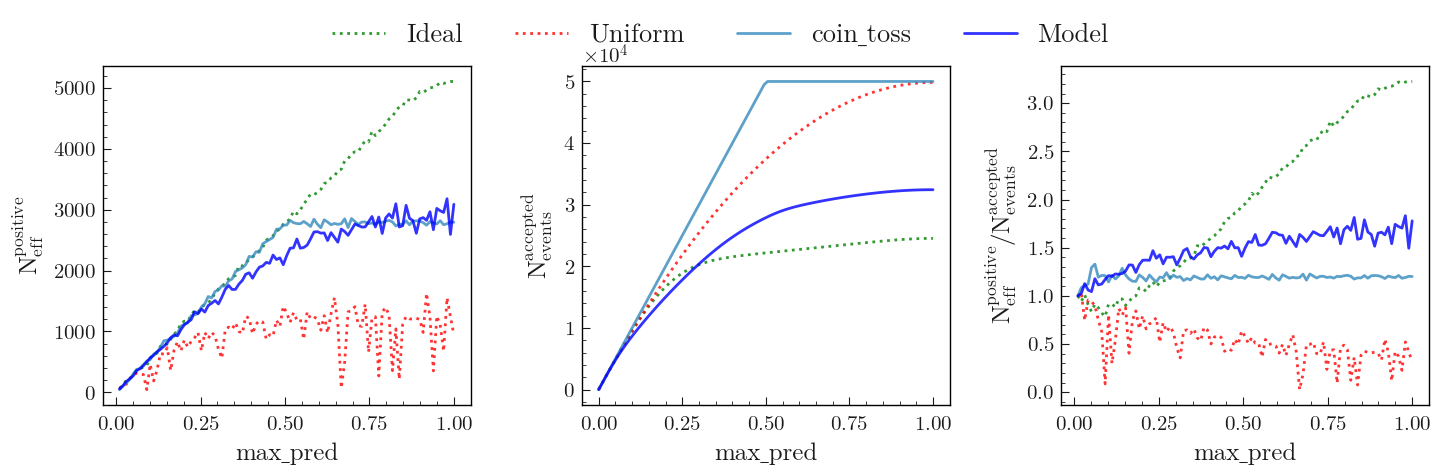

In [23]:


model_names_ = ['fake_pred', 'uniform_pred', 'coin_toss', 'gen2filt_hypertuned']
fig, axs = make_tri_plot('n_events_eff_pred', 'n_events_simulated', sdfs={k:sdfs[k] for k in model_names_}, x='max_pred', norm_idx=1)
utils.savefig(fig, os.path.join(plot_dir, "n_eff_pred.png") )


# fig, axs = make_tri_plot('n_photons_passed', 'n_photons_simulated', sdfs=sdfs)
# utils.savefig(fig, os.path.join(plot_dir, "n_photons_passed.png") )

100000 316.22776601683796 316.2277660168379
1.4173493733968725
2.008879246268507
1.0
relative uncert
1.4173493733968725
relative n_eff
0.49779


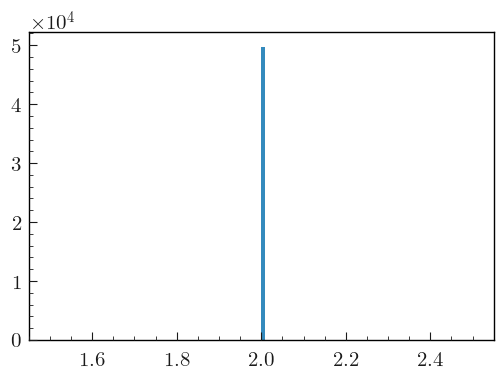

In [126]:
pred = df_['coin_toss']

w_pred, m_sample = get_weight_from_pred(pred)
_ = plt.hist( w_pred[m_sample], bins=100 )

calc_unc = lambda w: w.sum()/ np.sqrt( (w*w).sum() )

print( len(pred), np.sqrt(len(pred)), calc_unc(w_pred) )

print( np.sqrt(len(pred)) / calc_unc( w_pred[m_sample] ) )

print( len(m_sample)/calc_n_eff(w_pred[m_sample]) )
print( calc_n_eff(w_pred[m_sample]) /  m_sample.sum() )


print("relative uncert")
print( np.sqrt((len(pred))) / calc_unc( w_pred[m_sample] ) )

print("relative n_eff")
print( calc_n_eff(w_pred[m_sample]) / len(pred)  )


In [125]:
w_pred[m_sample]

3441713    2.0
4160127    2.0
679314     2.0
874247     2.0
2050872    2.0
          ... 
547246     2.0
4124126    2.0
4593207    2.0
2826710    2.0
1305322    2.0
Name: coin_toss, Length: 50195, dtype: float64

316.22776601683796
relative uncert
2.335950245263976
relative n_eff
0.18326216948131183


50202

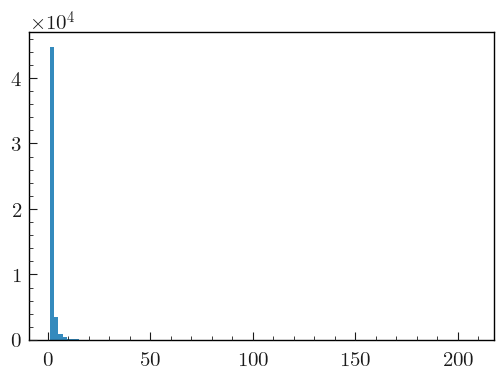

In [127]:
pred = df_['uniform_pred']

w_pred, m_sample = get_weight_from_pred(pred)
_ = plt.hist( w_pred[m_sample], bins=100 )

calc_unc = lambda w: w.sum()/ np.sqrt( (w*w).sum() )

print( np.sqrt(len(pred)) )

print("relative uncert")
print( np.sqrt((len(pred))) / calc_unc( w_pred[m_sample] ) )

print("relative n_eff")
print( calc_n_eff(w_pred[m_sample]) / len(pred)  )

m_sample.sum()

In [11]:
"""
    set a minimum rejection probability by creating an "underflow" prediction bin
"""



#model_name = 'gen2filt_hypertuned'
#model_name = 
#mf = mfs[model_name]
#model = mf.model 
#print(f'{len(mf.features)=}')
#def_pred = model.predict( df_[mf.features], batch_size=mf.batch_size ).flatten()

query = None

if query:
    df_ = df.query(query)
else:
    df_ = df

w_gen = df_['weights']
n_photons = df_['n_photons']

fake_pred = df_['fake_pred']
uniform_pred = df_['uniform_pred']
passed = df_['truth']==1


calc_n_eff = lambda w: w.sum()**2/(w**2).sum()
# del w_passed
# del w_def
# del sample_weight
sdfs = {}
for pred_name in ['fake_pred', 'uniform_pred'] + model_names:                        
    steps = []
    pred = df_[pred_name]
    for min_pred in np.linspace(0,1, 100):
        #print(min_pred)
        step_pred = np.where(pred<=min_pred, min_pred, pred )
        w_pred, mask_sample = get_weight_from_pred(step_pred )
        # w_step = w_def[step_mask]*pred_weights[step_mask]
        
#        w = pred_weights[sample_mask] * w_def[sample_mask]
#        w_passed = (pred_weights)[sample_mask & passed]
#        w = pred_weights[sample_mask]
        w_passed_gen  = w_gen[mask_sample & passed]
        w_passed_pred = w_pred[mask_sample & passed]
        
        n_events_eff_gen = calc_n_eff(w_passed_gen)
        n_events_eff_pred = calc_n_eff(w_passed_pred)
        n_events_eff = calc_n_eff(w_passed_pred*w_passed_gen)
        
        
        #di = calc_livetime(w_passed_pred*w_passed_gen, return_dict=True)        
        di = calc_livetime(w_passed_pred, return_dict=True)
        
        
        #n_events_eff = di['N_eff']
        n_events_simulated = step_pred.sum() 
        n_events_simulated = mask_sample.sum()
        
        #n_events_eff = (w_passed).sum()**2/( (w_passed*w_passed) ).sum()
        #w_passed = (w_pred)[mask_sample & passed]
        #n_events_eff = (w_passed_pred).sum()**2/( (w_passed_pred*w_passed_pred) ).sum()
        #speed_up = n_events_eff / n_events_simulated
        #n_events_eff = di['N_eff']

        # n_photons_passed = (n_photons*w_def*pred_weights)[sample_mask & passed].sum()
        # n_photons_simulated = (n_photons*w_def*pred_weights)[sample_mask].sum()
        n_photons_passed = (n_photons*w_gen)[mask_sample & passed].sum()
        n_photons_simulated = (n_photons*w_gen)[mask_sample].sum()

        
        # m = fake_pred_mask & passed
        # print( calc_livetime( df_[m]['weights']* df_[m]['fake_pred'], return_dict=True ) )
        
        # m = fake_pred_mask
        # print( calc_livetime( df_[m]['weights']* df_[m]['fake_pred'], return_dict=True ) )
        
        # r_livetime = calc_livetime( df_[mask_sample & passed]['weights']*pred_weights[mask_sample & passed] ) / \
        #              calc_livetime( df_[mask_sample]['weights']*pred_weights[mask_sample] )

        # livetime_per_n_photons = calc_livetime( df_[sample_mask & passed]['weights']*pred_weights[sample_mask & passed] ) / n_photons_simulated
                                 
        #/ calc_livetime(df_[sample_mask]['weights'])
        #n_photons_passed = (n_photons*pred_weights)[sample_mask

        #n_photons_passed = (
        
        steps.append(dict(min_pred=min_pred, 
                          # n_events_passed=n_events_passed, 
                          # n_events_passed2=n_events_passed2,
                          # n_events_eff=n_events_eff,
                          # n_photons_raw=n_photons_raw, 
                          # n_photons_weighted=n_photons_weighted, 
                          # n_photons_weighted_full=n_photons_weighted_full, 
                          # cpu_time_s=cpu_time_s, 
                          # speed_up = speed_up,
                          # mask=step_mask, 
                          # weights=w_step, 
                          # pred_weights=pred_weights, 
                          n_events_eff_gen=n_events_eff_gen,
                          n_events_eff_pred=n_events_eff_pred,
                          #n_events_eff_
                          n_events_eff=n_events_eff,
                          n_events_simulated=n_events_simulated,
                          #speed_up=speed_up,
                          n_photons_passed=n_photons_passed,
                          n_photons_simulated=n_photons_simulated,
                          #r_livetime=r_livetime,
                          #r = df_['weights'][sample_mask & passed].sum() / df_['weights'][sample_mask].sum(),       
                          #livetime_per_n_photons=livetime_per_n_photons,
                          #speed_up_2 
                          **di) 
                    )

    
    sdf = pd.DataFrame(steps)
    sdfs[pred_name] = sdf

/tmp/ipykernel_2332/3927319072.py:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if weight_col and weight_col in df:


In [14]:

model_names_ = ['fake_pred', 'uniform_pred', 'gen2filt_hypertuned']
sdfs = {k:sdfs[k] for k in model_names_}
#model_names_ = ['fake_pred', 'uniform_pred', 'pred']

fig, axs = make_tri_plot('n_events_eff', 'n_events_simulated', sdfs=sdfs)
utils.savefig(fig, os.path.join(plot_dir, "n_eff.png") )

fig, axs = make_tri_plot('n_events_eff_pred', 'n_events_simulated', sdfs=sdfs)
utils.savefig(fig, os.path.join(plot_dir, "n_eff_pred.png") )
fig, axs = make_tri_plot('n_events_eff_gen', 'n_events_simulated', sdfs=sdfs)
utils.savefig(fig, os.path.join(plot_dir, "n_eff_gen.png") )


KeyError: 'fake_pred'

In [21]:
"""
    set a minimum rejection probability by creating an "underflow" prediction bin
"""


query = None

if query:
    df_ = df.query(query)
else:
    df_ = df

w_gen = df_['weights']
n_photons = df_['n_photons']

# fake_pred = df_['fake_pred']
# uniform_pred = df_['uniform_pred']
#passed = df_['truth']==1

calc_n_eff = lambda w: w.sum()**2/(w**2).sum()

sdfs = {}
for pred_name in ['fake_pred', 'uniform_pred'] + model_names:                        
    steps = []
    pred = df_[pred_name]
    for min_pred in np.linspace(0,1, 100):
        step_pred = np.where(pred<=min_pred, min_pred, pred )
        w_pred, mask_sample = get_weight_from_pred(step_pred)

        n_events_simulated = step_pred.sum() 
        
        w_passed_gen  = w_gen[mask_sample & passed]
        w_passed_pred = w_pred[mask_sample & passed]
        
        n_events_eff_gen = calc_n_eff(w_passed_gen)
        n_events_eff_pred = calc_n_eff(w_passed_pred)
        n_events_eff = calc_n_eff(w_passed_pred*w_passed_gen)
        
        #di = calc_livetime(w_passed_pred, return_dict=True)
        n_photons_passed_raw = (n_photons)[mask_sample & passed].sum()
        n_photons_simulated_raw = (n_photons)[mask_sample].sum()

        n_photons_passed = (n_photons*w_gen)[mask_sample & passed].sum()
        n_photons_simulated = (n_photons*w_gen)[mask_sample].sum()

        
        steps.append(dict(min_pred=min_pred, 
                          n_events_eff_gen=n_events_eff_gen,
                          n_events_eff_pred=n_events_eff_pred,
                          n_events_eff=n_events_eff,
                          n_events_simulated=n_events_simulated,
                          n_photons_passed=n_photons_passed,
                          n_photons_simulated=n_photons_simulated,
                          n_photons_passed_raw=n_photons_passed_raw,
                          n_photons_simulated_raw=n_photons_simulated_raw,
                          
                          **di) 
                    )

    
    sdf = pd.DataFrame(steps)
    sdfs[pred_name] = sdf

{'dpi': 100, 'bbox_inches': 'tight'}
plot saved in: /data/user/navidkrad/plots/pres/feb2024/n_eff.png
directory /data/user/navidkrad/plots/pres/feb2024/n_eff.png --> 
https://convey.icecube.wisc.edu/data/user/navidkrad/plots/pres/feb2024/n_eff.png
{'dpi': 100, 'bbox_inches': 'tight'}
plot saved in: /data/user/navidkrad/plots/pres/feb2024/n_eff_pred.png
directory /data/user/navidkrad/plots/pres/feb2024/n_eff_pred.png --> 
https://convey.icecube.wisc.edu/data/user/navidkrad/plots/pres/feb2024/n_eff_pred.png
{'dpi': 100, 'bbox_inches': 'tight'}
plot saved in: /data/user/navidkrad/plots/pres/feb2024/n_eff_gen.png
directory /data/user/navidkrad/plots/pres/feb2024/n_eff_gen.png --> 
https://convey.icecube.wisc.edu/data/user/navidkrad/plots/pres/feb2024/n_eff_gen.png
{'dpi': 100, 'bbox_inches': 'tight'}
plot saved in: /data/user/navidkrad/plots/pres/feb2024/n_photons_passed.png
directory /data/user/navidkrad/plots/pres/feb2024/n_photons_passed.png --> 
https://convey.icecube.wisc.edu/data/use

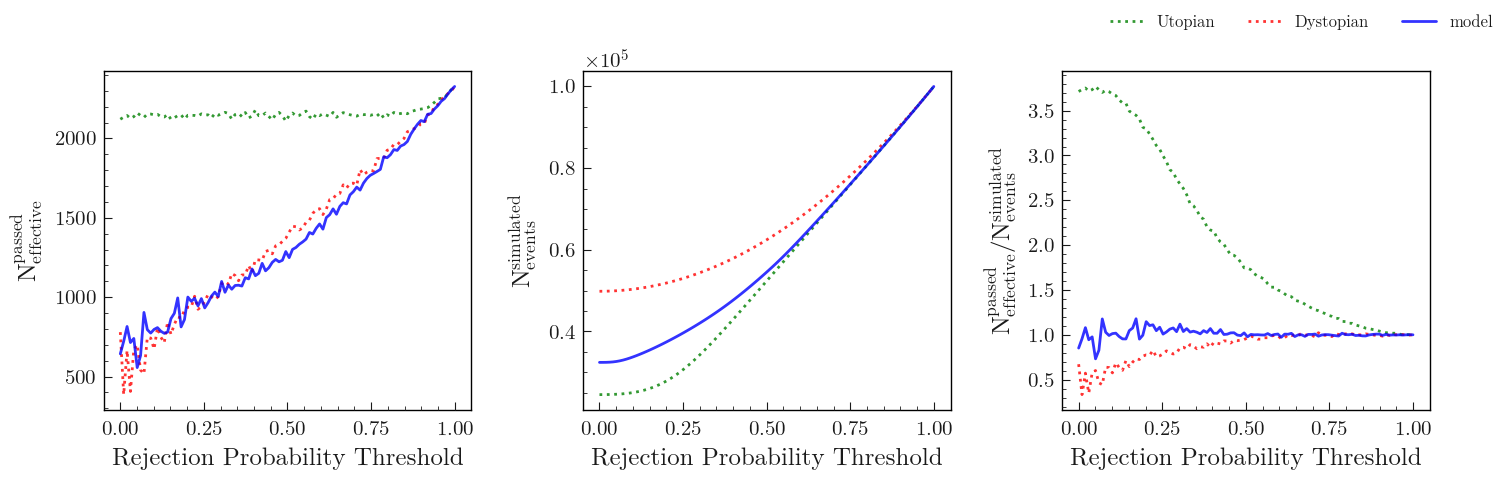

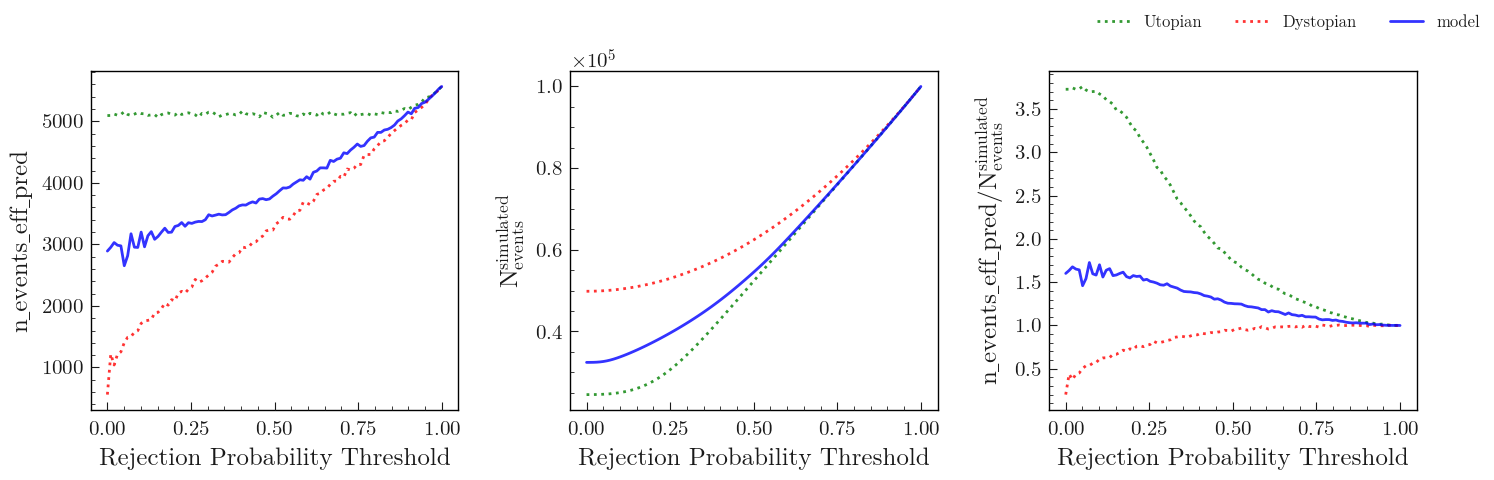

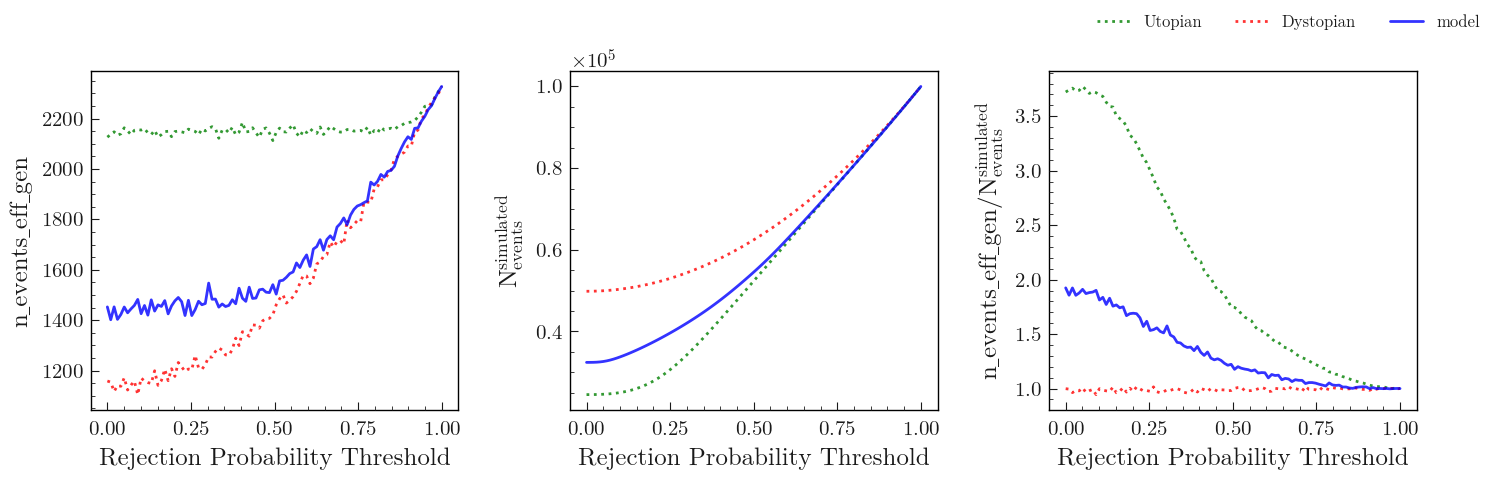

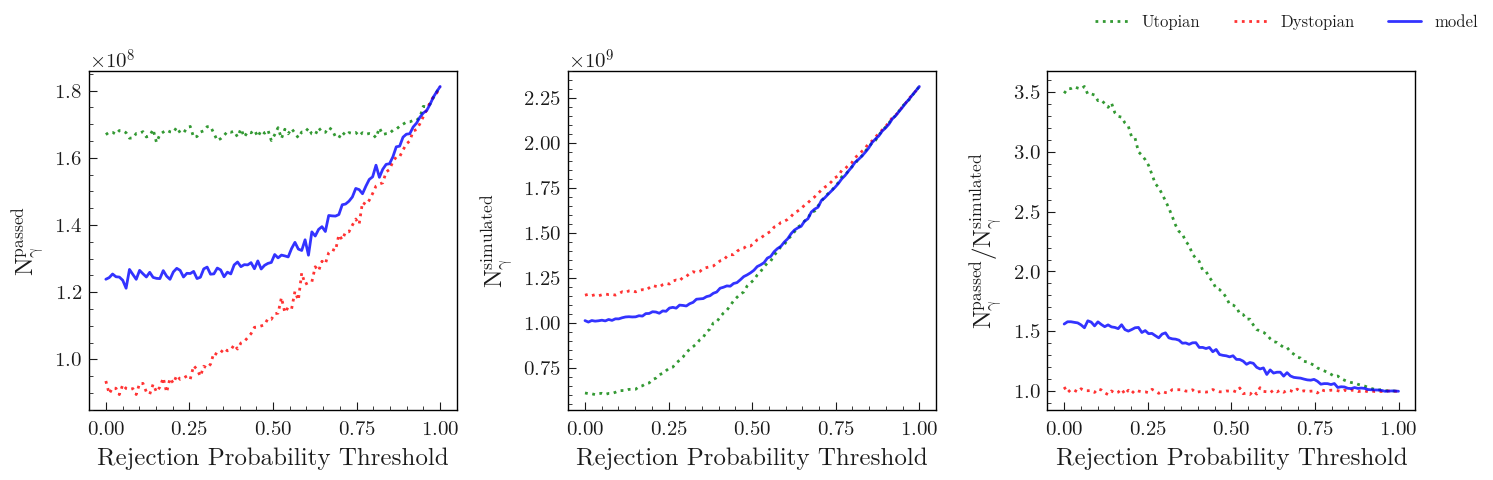

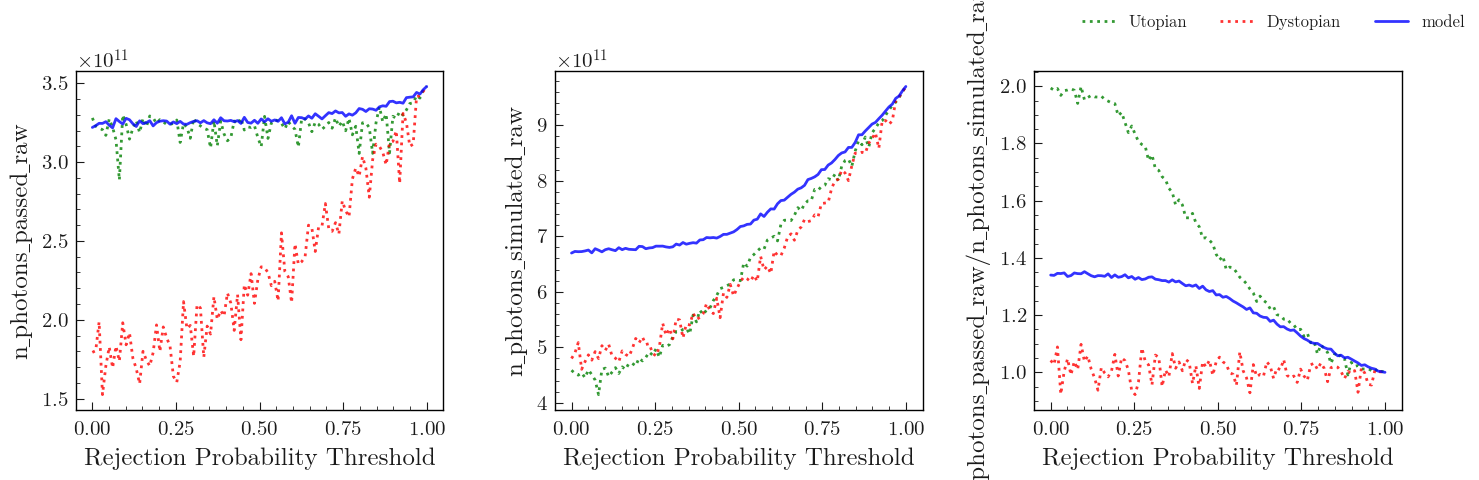

In [23]:

model_names_ = ['fake_pred', 'uniform_pred', 'gen2filt_hypertuned']
sdfs = {k:sdfs[k] for k in model_names_}
#model_names_ = ['fake_pred', 'uniform_pred', 'pred']

fig, axs = make_tri_plot('n_events_eff', 'n_events_simulated', sdfs=sdfs)
utils.savefig(fig, os.path.join(plot_dir, "n_eff.png") )

fig, axs = make_tri_plot('n_events_eff_pred', 'n_events_simulated', sdfs=sdfs)
utils.savefig(fig, os.path.join(plot_dir, "n_eff_pred.png") )
fig, axs = make_tri_plot('n_events_eff_gen', 'n_events_simulated', sdfs=sdfs)
utils.savefig(fig, os.path.join(plot_dir, "n_eff_gen.png") )


fig, axs = make_tri_plot('n_photons_passed', 'n_photons_simulated', sdfs=sdfs)
utils.savefig(fig, os.path.join(plot_dir, "n_photons_passed.png") )

fig, axs = make_tri_plot('n_photons_passed_raw', 'n_photons_simulated_raw', sdfs=sdfs)
utils.savefig(fig, os.path.join(plot_dir, "n_photons_passed.png") )



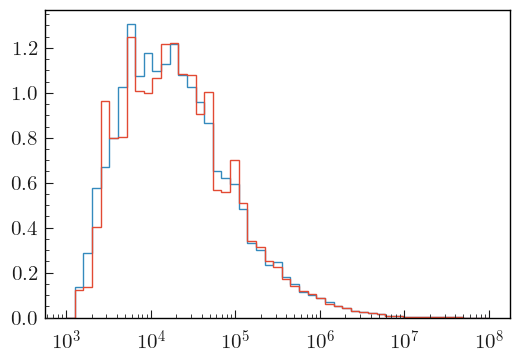

In [34]:

pred = df_[nominal_model]
w_pred, mask_sample = get_weight_from_pred(pred)


var = 'energy'
bins = plt.geomspace(1E3,1E8,50)

fig, ax  = plt.subplots()

kw = dict(bins=bins, histtype='step')

_ = ax.hist(df_[var][passed], weights=df_['weights'][passed], **kw)
_ = ax.hist(df_[var][mask_sample & passed], weights=df_['weights'][mask_sample & passed]*w_pred[mask_sample & passed], **kw)
#_ = ax.hist(df_[var][passed],  **kw)



ax.set_xscale('log')


In [36]:
calc_livetime ( df_['weights'][mask_sample & passed]*w_pred[mask_sample & passed] ) , calc_livetime ( df_['weights'][mask_sample & passed]*w_pred[mask_sample & passed] )

34.051366857810756

In [20]:
"""
    set a minimum rejection probability by creating an "underflow" prediction bin
"""



model_name = 'gen2filt_hypertuned'
mf = mfs[model_name]
model = mf.model 
print(f'{len(mf.features)=}')
def_pred = model.predict( df_[mf.features], batch_size=mf.batch_size ).flatten()
fake_pred = df_['fake_pred']
uniform_pred = df_['uniform_pred']

w_def = df_['weights']

passed = df_['truth']==1

sdfs = {}
for pred_name, pred in ( ('fake_pred', fake_pred), 
                        ('gen2filt_hypertuned', def_pred) ,
                        ('uniform_pred',  uniform_pred),
                       ):
    steps = []
    for min_pred in np.linspace(0,1, 20):
        step_pred = np.where(pred<=min_pred, min_pred, pred )
        pred_weights, sample_mask = get_weight_from_pred(step_pred )

        n_events_simulated = step_pred.sum() 
        
        w_passed = (pred_weights)[sample_mask & passed]
        
        n_events_eff = calc_n_eff(w_passed)
        
        
        step_pred = np.where(pred<=min_pred, min_pred, pred )
        w_pred, mask_sample = get_weight_from_pred(step_pred )

        w_pred_passed = w_pred[mask_sample & passed]
        
        n_events_eff1 = calc_n_eff(w_pred_passed)
        
        
        steps.append(dict(min_pred=min_pred, 
                          n_events_eff1=n_events_eff1,
                          n_events_eff=n_events_eff,
                          n_events_simulated=n_events_simulated,
                          **di) 
                    )

    
    sdf = pd.DataFrame(steps)
    sdfs[pred_name] = sdf

len(mf.features)=17
13/13 [==============================] - 0s 8ms/step


{'dpi': 100, 'bbox_inches': 'tight'}
plot saved in: /data/user/navidkrad/plots/pres/feb2024/n_eff.png
directory /data/user/navidkrad/plots/pres/feb2024/n_eff.png --> 
https://convey.icecube.wisc.edu/data/user/navidkrad/plots/pres/feb2024/n_eff.png


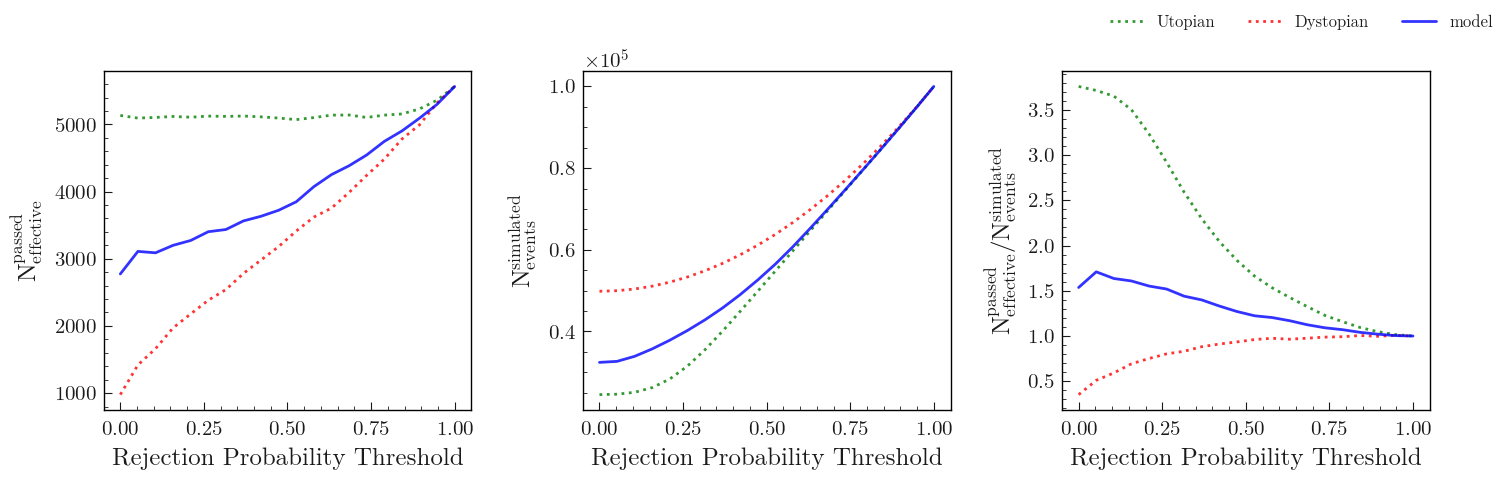

In [99]:


model_names_ = ['fake_pred', 'uniform_pred', 'gen2filt_hypertuned']
sdfs = {k:sdfs[k] for k in model_names_}
#model_names_ = ['fake_pred', 'uniform_pred', 'pred']

fig, axs = make_tri_plot('n_events_eff', 'n_events_simulated', sdfs=sdfs)
utils.savefig(fig, os.path.join(plot_dir, "n_eff.png") )

# fig, axs = make_tri_plot('n_events_eff_pred', 'n_events_simulated', sdfs=sdfs)
# utils.savefig(fig, os.path.join(plot_dir, "n_eff_pred.png") )
# fig, axs = make_tri_plot('n_events_eff_gen', 'n_events_simulated', sdfs=sdfs)
# utils.savefig(fig, os.path.join(plot_dir, "n_eff_gen.png") )


# fig, axs = make_tri_plot('n_events_eff1', 'n_events_simulated', model_names=model_names_)
# utils.savefig(fig, os.path.join(plot_dir, "n_eff.png") )


# fig, axs = make_tri_plot('n_photons_passed', 'n_photons_simulated', model_names=model_names_)
# utils.savefig(fig, os.path.join(plot_dir, "n_photons_passed.png") )
# fig, axs = make_tri_plot('n_events_eff', 'n_events_simulated', model_names=model_names_)
# utils.savefig(fig, os.path.join(plot_dir, "n_eff.png") )


# fig, axs = make_tri_plot('n_events_eff_pred', 'n_events_simulated', model_names=model_names_)
# utils.savefig(fig, os.path.join(plot_dir, "n_eff_pred.png") )
# fig, axs = make_tri_plot('n_events_eff_gen', 'n_events_simulated', model_names=model_names_)
# utils.savefig(fig, os.path.join(plot_dir, "n_eff_gen.png") )


[0.1, 0.5]
[0.1, 0.5]
[0.1, 0.5]
[0.1, 0.5]
[0.1, 0.5]
[0.1, 0.5]
[0.1, 0.5]
[0.1, 0.5]
[0.1, 0.5]
[0.1, 0.5]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]
[0.5, 0.9]


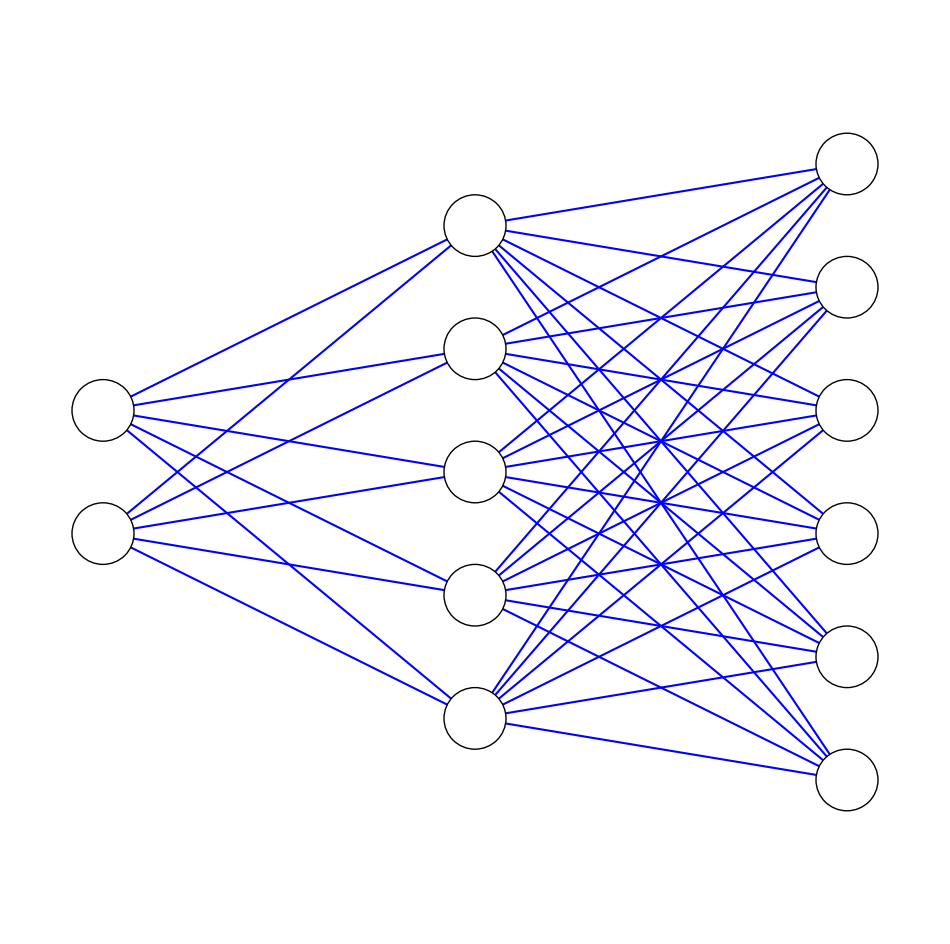

In [70]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes, node_size=1, **line_kwargs):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle( (n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4. *node_size,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                print([n*h_spacing + left, (n + 1)*h_spacing + left])
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='b', **line_kwargs)
                ax.add_artist(line)


fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [2,5,6],  )


model_kwargs = {'init_layer': 10, 'final_layer': 2, 'layer_repeat': 2, 'unit_step': 2, 'dropout': False, 'hidden_activation': 'leaky_relu', 'max_layers': 30}


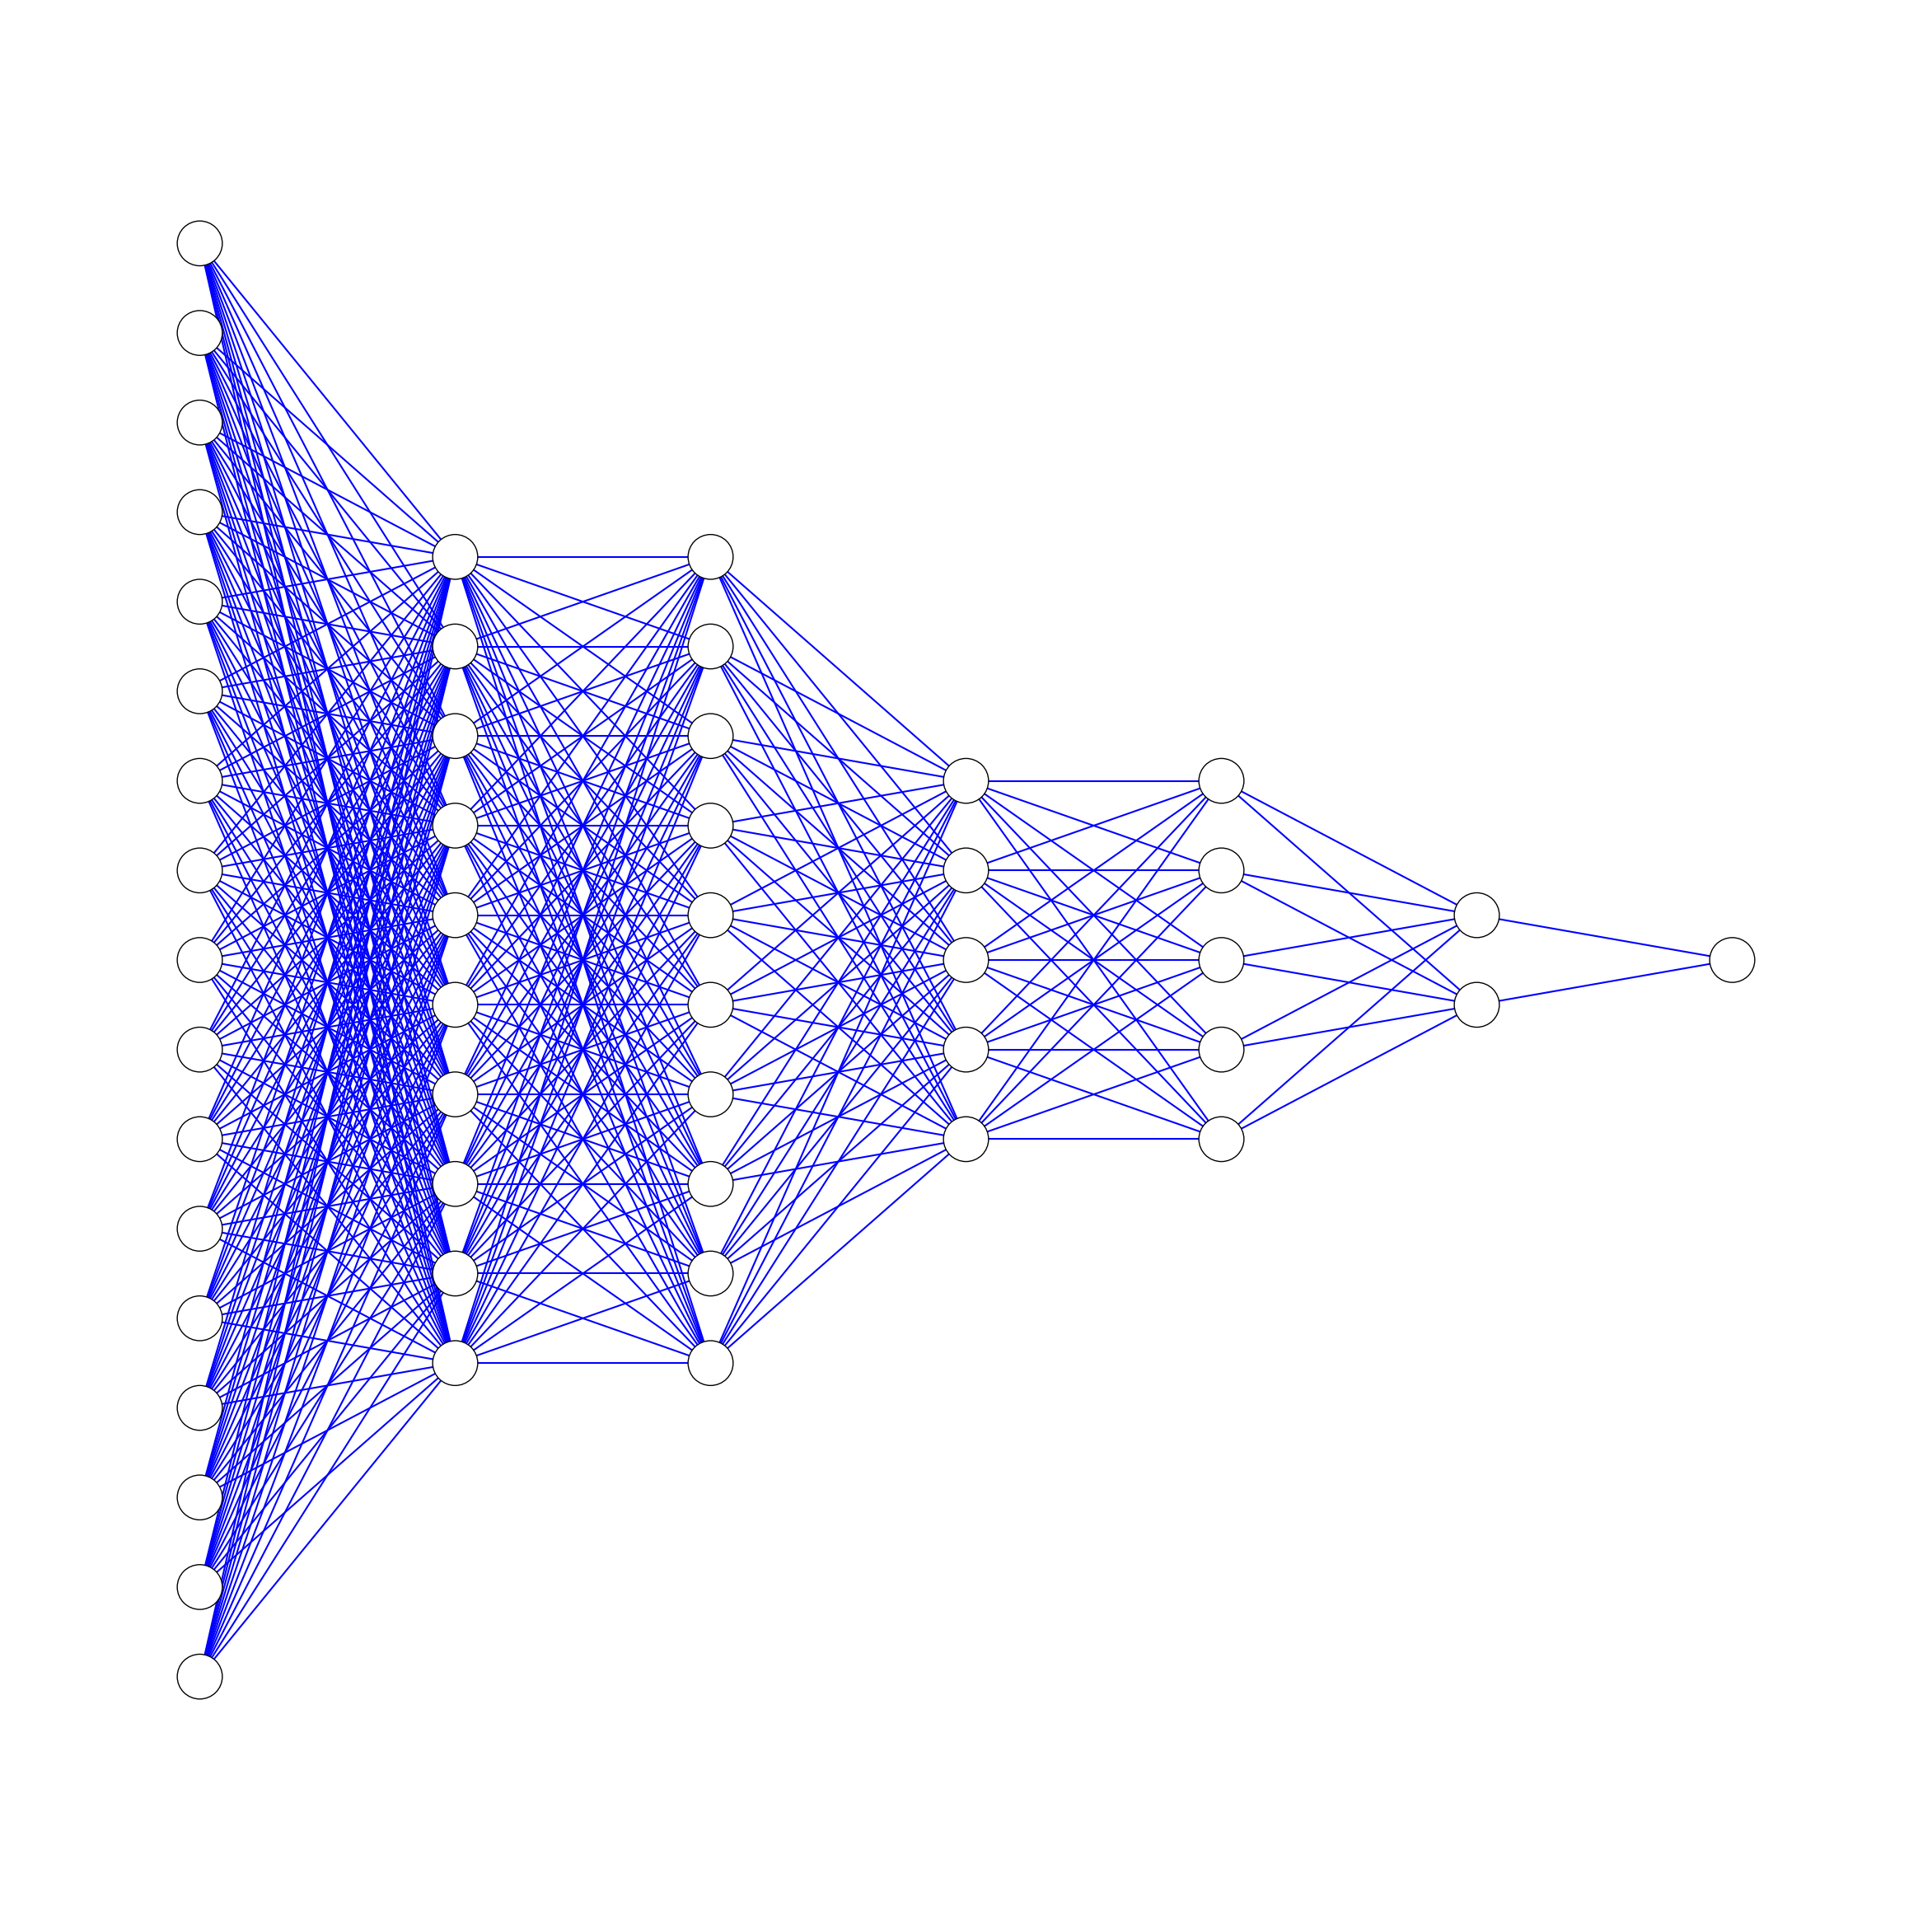

In [94]:
def draw_model(ax, left, right, bottom, top, layers, node_size=1, **line_kwargs):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    layer_sizes = [l.output_shape[-1] for l in layers]
    
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle( (n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4. *node_size,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                #print([n*h_spacing + left, (n + 1)*h_spacing + left])
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='b', **line_kwargs)
                ax.add_artist(line)


#mf.final_layer=2
#mf.init_layer=10
mf.hyper_params.update(layer_repeat=2, final_layer=2, init_layer=10, dropout=False, unit_step=2)
mf.define_model()
#mf.model.summary()


#plt.hist(mf.model.layers[2].weights[0].numpy().flatten())

layers = mf.model.layers
fig = plt.figure(figsize=(30, 30))
ax = fig.gca()
ax.axis('off')
draw_model(ax, 0.1,0.9,0.1,0.9, layers)

In [44]:
dir(mf.model.layers[0])

model = mf.model
layer_sizes = [l.output_shape[-1] for l in model.layers]
layer_names = [l.name for l in model.layers]
print(layer_sizes)

[17, 128, 128, 16, 4, 1]


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-3.02223945, -2.97000837, -2.9177773 , -2.86554623, -2.81331539,
        -2.76108432, -2.70885324, -2.65662217, -2.6043911 , -2.55216002,
        -2.49992919, -2.44769812, -2.39546704, -2.34323597, -2.2910049 ,
        -2.23877382, -2.18654299, -2.13431191, -2.08208084, -2.02984977,
        -1.97761869, -1.92538774, -1.87315667, -1.82092559, -1.76869464,
        -1.71646357, -1.66423249, -1.61200154, -1.55977046, -1.50753939,
        -1.45530844, -1.40307736, -1.35084629, -1.29861534, -1.24638426,
        -1.19415319, -1.14192224, -1.08

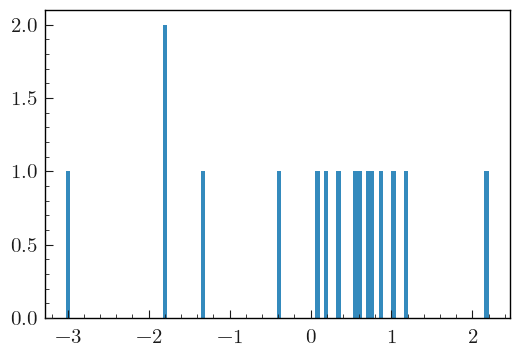

In [69]:
_plt.hist( mf.model.layers[3].weights[1].numpy().flatten(), bins=100 )
#mf.model.layers[2].name

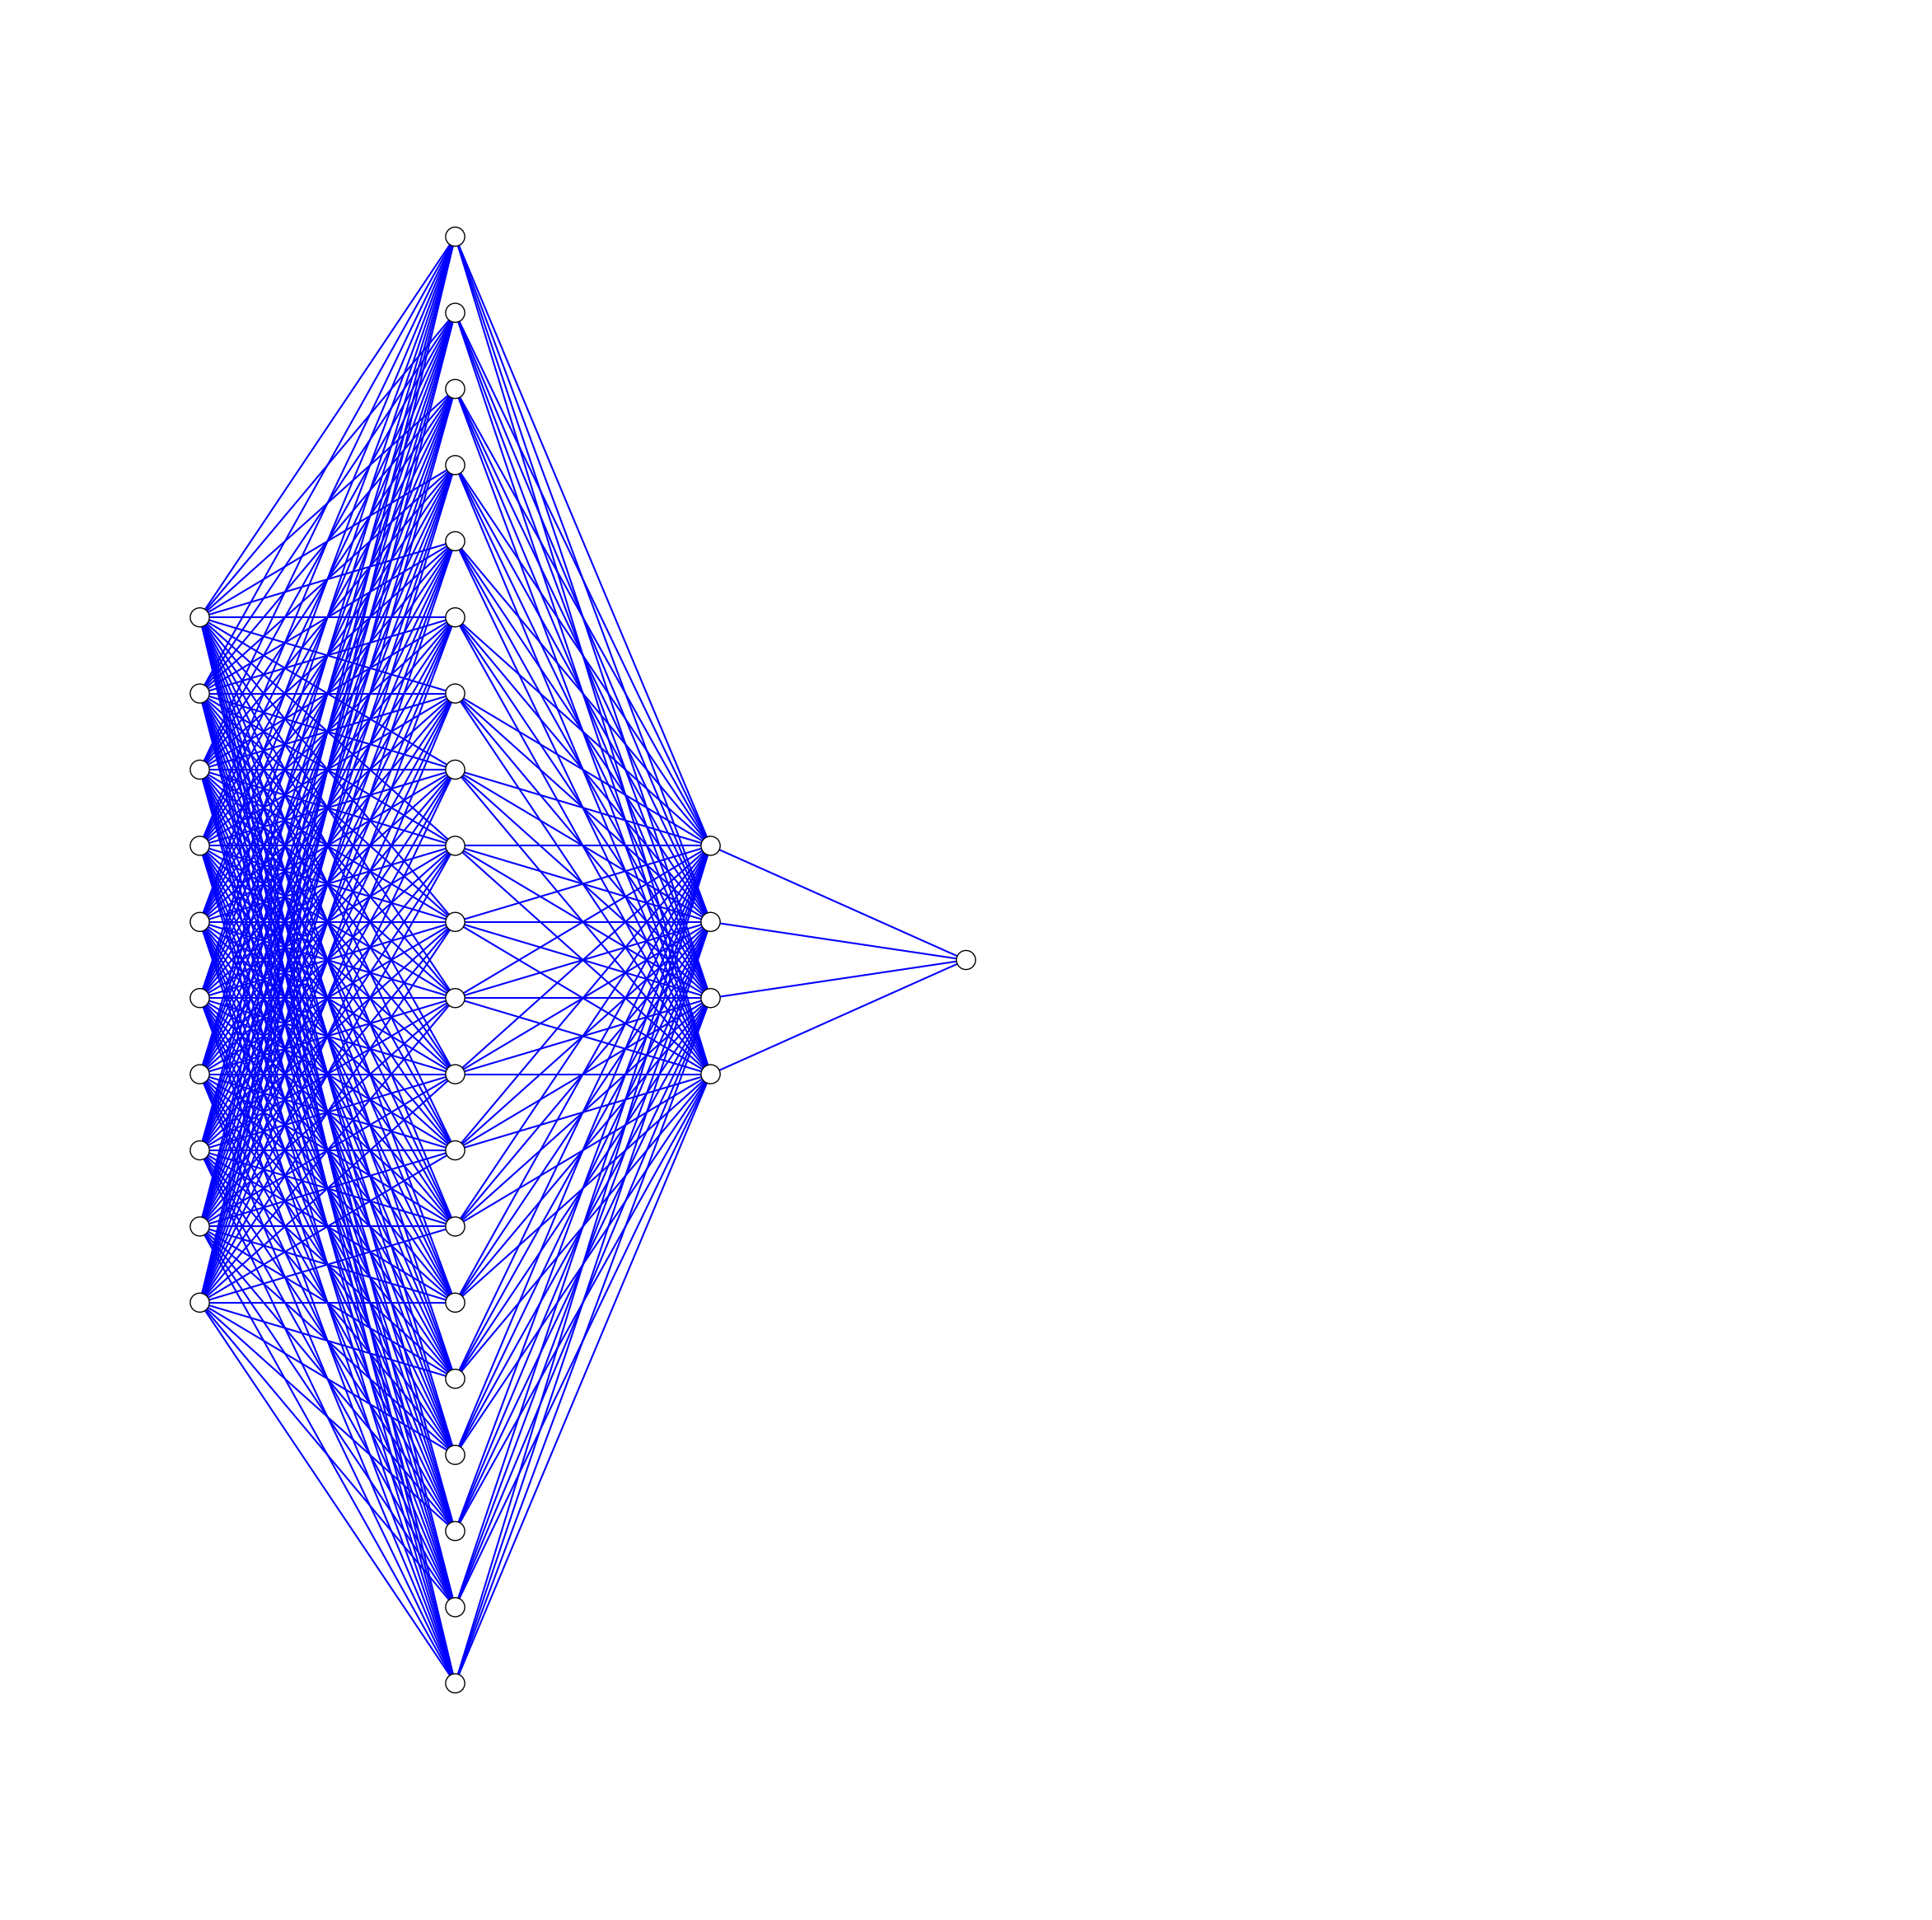

In [51]:
fig = plt.figure(figsize=(30, 30))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .5, .1, .9, layer_sizes=[10, 20, 4, 1], node_size=0.5)


In [11]:
#df_ = df.query('n_photons>0')

query = None

if query:
    df_ = df.query(query)
else:
    df_ = df



pred_weights, pred_mask = get_weight_from_pred(df_['pred'] )
df_['rand'] = np.ones(len(df_))*0.5
rand_weights, rand_mask = get_weight_from_pred(df_['rand'] )

w_def = df_['weights']
#w_def = np.ones_like(w_def)
print('default:', np.sum(1.0/w_def) )
def_livetime = calc_livetime(w_def, return_dict=True)
print( def_livetime )

w_pred = w_def[pred_mask]*pred_weights[pred_mask]
print('pred:', np.sum(1.0/w_pred) )
pred_livetime = calc_livetime(w_pred, return_dict=True)
print( pred_livetime )

w_rand = w_def[rand_mask]*rand_weights[rand_mask]
print('rand:', np.sum(1.0/w_rand) )
rand_livetime = calc_livetime(w_rand, return_dict=True)
print( rand_livetime )

fake_pred_weights, fake_pred_mask = get_weight_from_pred(df_['fake_pred'] )
w_fake = w_def[fake_pred_mask]*fake_pred_weights[fake_pred_mask]
len(w_fake)
fake_livetime = calc_livetime(w_fake, return_dict=True)
print('fake:', np.sum(1/w_fake) )
print(fake_livetime )




print('default:   ', def_livetime['total_rate'])
print('prediction:', pred_livetime['total_rate'])
print('random:    ', rand_livetime['total_rate'])

KeyError: 'pred'

In [ ]:

#[k for k in mf.df_test.columns if 'energy' in k.lower()]
#mf.features

df_ = df.query('multiplicity==3')

(df_['mu2_energy'] > df_['mu1_energy']).sum() / (df_['mu1_energy'] > df_['mu2_energy']).sum()

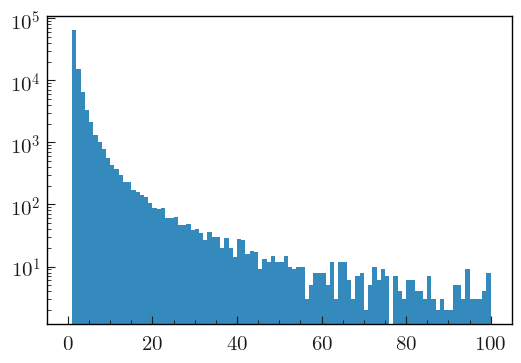

In [27]:
#_=plt.hist( np.cos(df['zenith']) - df['cos_theta'], bins=100, range=(-4E-8,4E-8) )

#_=plt.hist( df['z']-df['depth'] , bins=100,)
_ = plt.hist(df['multiplicity'], bins=100, range=(0,100))

plt.yscale('log')

In [33]:
df.query('multiplicity==0')

Empty DataFrame
Columns: [index, n_photons, minorID, length, zenith, theta, majorID, z, energy, azimuth, pdg_encoding, x, y, interaction_height, depth, cos_theta, multiplicity, mu1_energy, mu2_energy, mu3_energy, mu4_energy, mu5_energy, mu6_energy, mu7_energy, mu8_energy, mu9_energy, mu10_energy, mu1_radius, mu2_radius, mu3_radius, mu4_radius, mu5_radius, mu6_radius, mu7_radius, mu8_radius, mu9_radius, mu10_radius, generated, weights, triggered, filtered, atomic_mass, log_length, mu_energy_mean, mu_energy_std, mu_energy_max, mu_energy_min, mu_radius_mean, mu_radius_std, mu_radius_max, mu_radius_min, energy_per_nucleus, mu_bundle_energy, log_energy, mu1_log_energy, mu2_log_energy, mu3_log_energy, mu4_log_energy, mu5_log_energy, mu6_log_energy, mu7_log_energy, mu8_log_energy, mu9_log_energy, mu10_log_energy, mu_log_energy_mean, mu_log_energy_std, mu_log_energy_max, mu_log_energy_min, log_energy_per_nucleus, mu_bundle_log_energy, rho, r, log_z, log_rho, log_r, pdg_map, mu_bundle_energy_fraction, mu_leading_energy_fraction, singleness, cos_azimuth, cos_zenith, pred, truth, fake_pred, uniform_pred]
Index: []

[0 rows x 85 columns]

In [141]:
#mask

v = 'energy'
print(f"""
{(df_[v]*1).sum():0.3e},
{(df_[v]*w_def).sum():0.3e}
{(df_[pred_mask][v]*w_pred).sum():0.3e}
{(df_[fake_pred_mask][v]*w_fake).sum():0.3e}
""")


2.425e+10,
1.770e+07
1.763e+07
1.757e+07



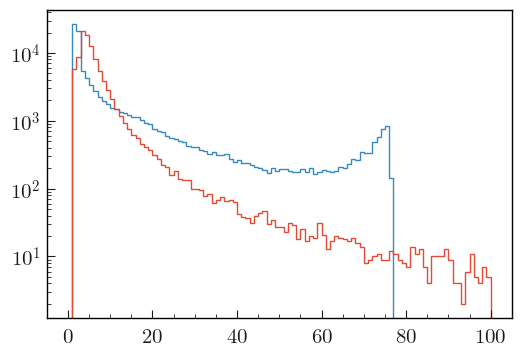

In [142]:

fig, ax = plt.subplots()
_ = ax.hist( pred_weights, bins=100, range=(0,100), histtype='step' )
_ = ax.hist( fake_pred_weights, bins=100, range=(0,100), histtype='step' )
ax.set_yscale('log')


(7.560+/-0.102)e+02 73.88586551463891
(7.44+/-2.95)e+02 2.527371904957148
(7.514+/-0.202)e+02 37.2078406834514


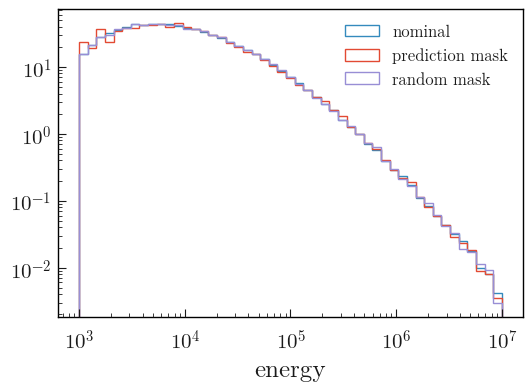

In [143]:
from uncertainties import ufloat

var = 'energy'
bins = np.geomspace(1E3, 1E7)

fig, ax = plt.subplots()
kw = dict(histtype='step', bins=bins)


_ = ax.hist(df_[var], weights=df_['weights'], **kw,    label='nominal')
_ = ax.hist(df_[pred_mask][var], weights=w_pred, **kw, label='prediction mask')
_ = ax.hist(df_[rand_mask][var], weights=w_rand, **kw, label='random mask')


ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(var)


print( f"{ufloat(w_def.sum(),  (w_def*w_def).sum() ):.3ue}" , calc_livetime(w_def)   )
print( f"{ufloat(w_pred.sum(), (w_pred*w_pred).sum() ):.3ue}", calc_livetime(w_pred) )
print( f"{ufloat(w_rand.sum(), (w_rand*w_rand).sum() ):.3ue}", calc_livetime(w_rand) )





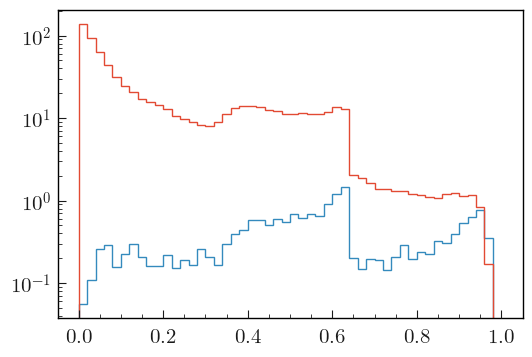

In [144]:
fig, ax = plt.subplots()



_ = ax.hist(df_[passed]['pred'],   weights=df_[passed]['weights'], histtype='step', bins=50, range=(0,1) )
_ = ax.hist(df_[~passed]['pred'],  weights=df_[~passed]['weights'], histtype='step', bins=50, range=(0,1) )

ax.set_yscale('log')

(7.560+/-0.102)e+02 73.88586551463891
(7.44+/-2.95)e+02 2.527371904957148
(7.514+/-0.202)e+02 37.2078406834514


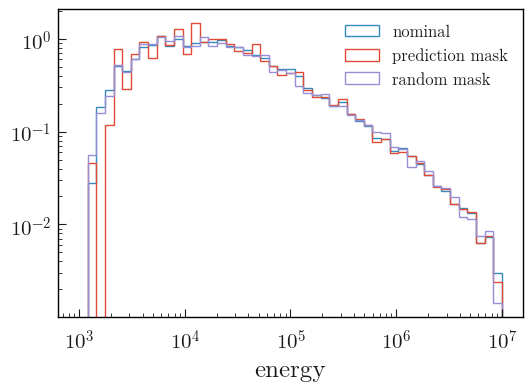

In [145]:
from uncertainties import ufloat

var = 'energy'
bins = np.geomspace(1E3, 1E7)

fig, ax = plt.subplots()
kw = dict(histtype='step', bins=bins)

filtered_mask = df_.filtered == 1

_ = ax.hist(df_[filtered_mask][var],             weights=df_['weights'][filtered_mask], **kw,    label='nominal')
_ = ax.hist(df_[pred_mask & filtered_mask][var], weights=w_pred[filtered_mask], **kw, label='prediction mask')
_ = ax.hist(df_[rand_mask & filtered_mask][var], weights=w_rand[filtered_mask], **kw, label='random mask')


ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(var)


print( f"{ufloat(w_def.sum(),  (w_def*w_def).sum() ):.3ue}" , calc_livetime(w_def)   )
print( f"{ufloat(w_pred.sum(), (w_pred*w_pred).sum() ):.3ue}", calc_livetime(w_pred) )
print( f"{ufloat(w_rand.sum(), (w_rand*w_rand).sum() ):.3ue}", calc_livetime(w_rand) )

# passed = df_.filtered==1
# print( f"{ufloat(w_def.sum(),  (w_def*w_def).sum() ):.3ue}" , calc_livetime(w_def[passed],  return_dict=True)   )
# print( f"{ufloat(w_pred.sum(), (w_pred*w_pred).sum() ):.3ue}", calc_livetime(w_pred[passed], return_dict=True) )
# print( f"{ufloat(w_rand.sum(), (w_rand*w_rand).sum() ):.3ue}", calc_livetime(w_rand[passed],  return_dict=True ) )
    




In [146]:
calc_livetime( df_[filtered_mask]['weights'] ) 

123.77362917432268

[('gen2filt_weighted',
  2702181    0.332619
  3341439    0.025879
  1178839    0.123978
  3807627    0.628970
  3312789    0.895582
               ...   
  1039046    0.113891
  2481329    0.358934
  613818     0.589214
  41494      0.581031
  4430752    0.199966
  Name: gen2filt_weighted, Length: 100000, dtype: float32),
 ('gen2filt_primary',
  2702181    0.649365
  3341439    0.445319
  1178839    0.292553
  3807627    0.590813
  3312789    0.686383
               ...   
  1039046    0.482183
  2481329    0.351945
  613818     0.540132
  41494      0.468050
  4430752    0.487194
  Name: gen2filt_primary, Length: 100000, dtype: float32)]

dict_keys(['fake_pred', 'pred', 'uniform'])

In [199]:
DEFAULT_FEATURE_SETS = [
    "primary",
    "muons",
    "muons_radius_sum",
    "muons_log_energy_sum",
    "muons_radius",
    "muons_log_energy",
]
print(" ".join(DEFAULT_FEATURE_SETS))

from features import select_features

select_features(DEFAULT_FEATURE_SETS)

primary muons muons_radius_sum muons_log_energy_sum muons_radius muons_log_energy


['log_z',
 'log_rho',
 'log_length',
 'log_energy',
 'interaction_height',
 'cos_zenith',
 'pdg_map',
 'depth',
 'cos_theta',
 'multiplicity',
 'mu_radius_mean',
 'mu_radius_std',
 'mu_radius_min',
 'mu_radius_max',
 'mu_log_energy_mean',
 'mu_log_energy_std',
 'mu_log_energy_min',
 'mu_log_energy_max',
 'mu1_radius',
 'mu2_radius',
 'mu3_radius',
 'mu4_radius',
 'mu5_radius',
 'mu6_radius',
 'mu7_radius',
 'mu8_radius',
 'mu9_radius',
 'mu10_radius',
 'mu1_log_energy',
 'mu2_log_energy',
 'mu3_log_energy',
 'mu4_log_energy',
 'mu5_log_energy',
 'mu6_log_energy',
 'mu7_log_energy',
 'mu8_log_energy',
 'mu9_log_energy',
 'mu10_log_energy']

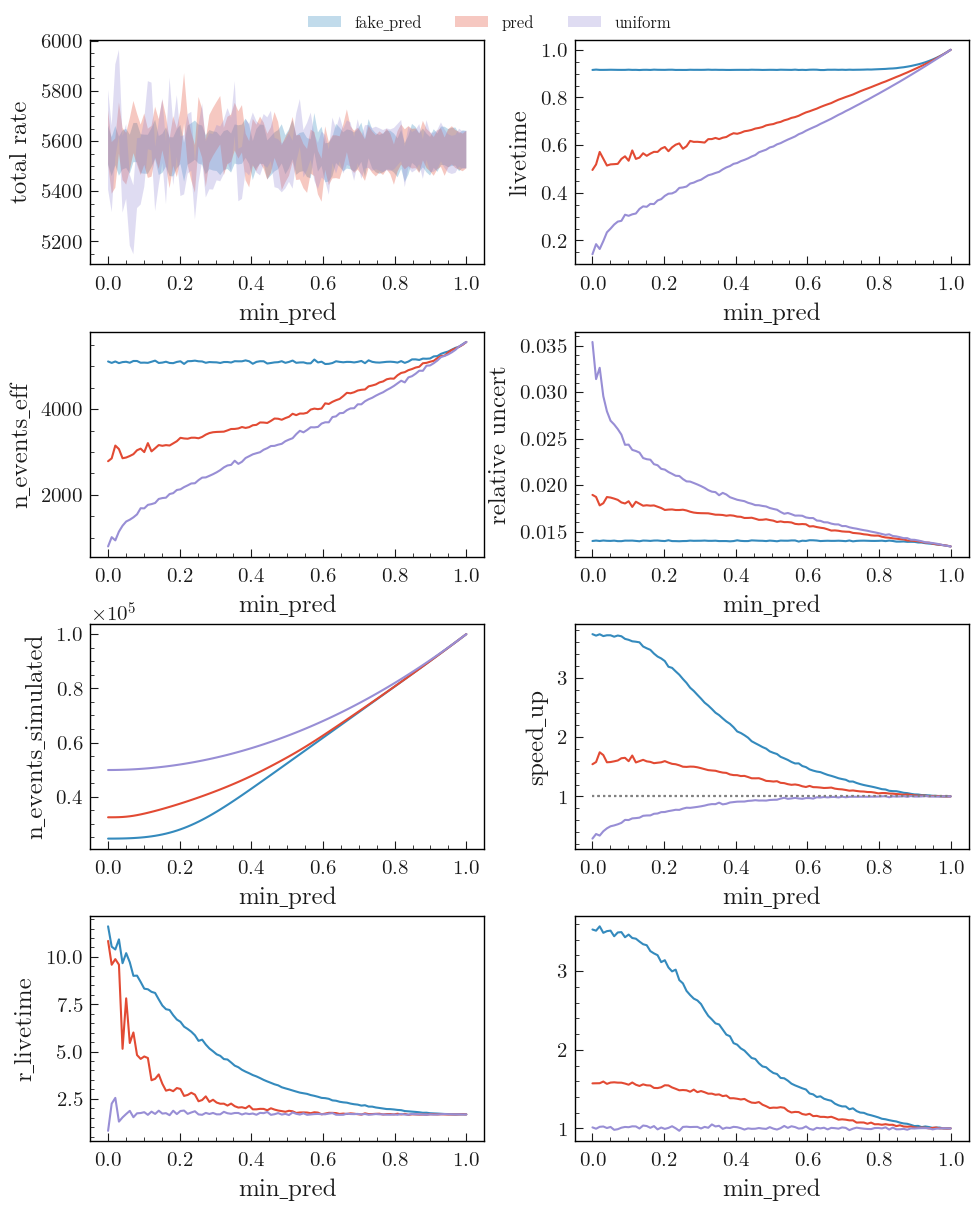

In [150]:
fig, axs = plt.subplots(ncols=2, nrows=4, squeeze=False, figsize=(10,12) )
fig.tight_layout(pad=1.5)
axs = axs.flatten()

for pred_name, sdf in sdfs.items():
    ax = axs[0]

    ax.fill_between(sdf['min_pred'], sdf['R']+sdf['DeltaR'], sdf['R']-sdf['DeltaR'], alpha=0.3, label=pred_name)
    ax.set_xlabel("min_pred")
    ax.set_ylabel("total rate")
    
    ax = axs[1]
    x = 'min_pred'
    y = 'livetime'
    ax.plot( sdf[x], sdf[y] )
    #ax.hlines( pred_livetime['livetime'], 0,1, color='gray', ls='--')
    ax.set_ylabel(y)
    ax.set_xlabel(x)
    
    
    ax = axs[2]
    x = 'min_pred'
    y = 'n_events_eff'
    ax.plot( sdf[x], sdf[y] )
    ax.set_ylabel(y)
    ax.set_xlabel(x)

    ax = axs[3]
    x = 'min_pred'
    y = 'n_events_eff'
    ax.plot( sdf[x], 1.0/np.sqrt(sdf[y]) )
    ax.set_ylabel('relative uncert')
    ax.set_xlabel(x)
    
    ax = axs[4]
    x = 'min_pred'
    y = 'n_events_simulated'
    ax.plot( sdf[x], sdf[y] )
    ax.set_ylabel(y)
    ax.set_xlabel(x)
    
    ax = axs[5]
    x = 'min_pred'
    y = 'speed_up'
    ax.plot( sdf[x], sdf[y] / (len(df_[passed])/len(df_)) )
    ax.set_ylabel(y)
    ax.set_xlabel(x)
    ax.hlines( 1 , 0, 1, ls=':', color='gray')

    ax = axs[6]
    x = 'min_pred'
    y = 'r_livetime'
    ax.plot( sdf[x], sdf[y]  )
    ax.set_ylabel(y)
    ax.set_xlabel(x)

    ax = axs[7]
    x = 'min_pred'
    y = ""
    ax.plot( sdf[x], sdf['n_photons_passed']/sdf['n_photons_simulated'] / (sdf.iloc[-1]['n_photons_passed']/sdf.iloc[-1]['n_photons_simulated'])  )
    #y = 'n_photons_simulated'
    #ax.plot( sdf[x], sdf['n_photons_passed']/sdf['n_photons_simulated']  )
    #ax.plot( sdf[x],  sdf['r']*sdf['livetime']/( (df_['weights'][passed].sum()/df_['weights'].sum() )*calc_livetime(df_['weights']) ) )
    
    #ax.plot( sdf[x],  sdf['r']*sdf['livetime']/( (df_['weights'][passed].sum()/df_['weights'].sum() )*calc_livetime(df_['weights']) ) )

    #ax.set_ylabel(y)
    ax.set_xlabel(x)

    # ax = axs[5]
    # x = 'min_pred'
    # y = 'n_photons_weighted_full'
    # # ax.plot( sdf[x], sdf['livetime']/(sdf['cpu_time_s']) )
    # ax.plot( sdf[x], sdf['livetime']/(sdf[y]), label=pred_name)
    # ax.set_ylabel(f"livetime/{y}")
    # ax.set_xlabel(x)

fig.legend(loc='upper center', ncol=len(sdfs))



In [202]:
df_['triggered'].value_counts()/len(df_)*100

triggered
0.0    68.564
1.0    31.436
Name: count, dtype: float64

In [189]:
#pred = df_['rand']
pred = np.random.rand(len(pred))
pred = df_['fake_pred']
#pred = np.ones(len(pred))*0.5

vals = []
for i in range(1_000):
    w, m = get_weight_from_pred(pred)
    N_eff = (w[m].sum())**2/(w[m]*w[m]).sum()
    vals.append(N_eff)



14892.368489169537 79.48547663772807
0.24555


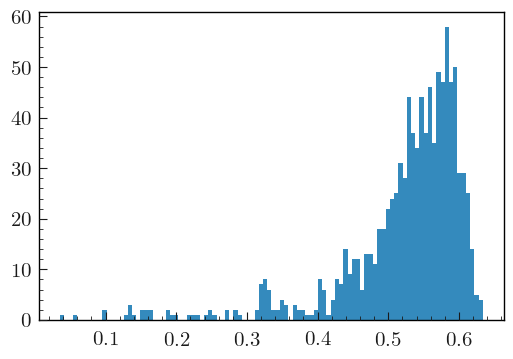

In [190]:

#N_eff_tot = (w.sum())**2/(w*w).sum()
N_simulated = pred.sum()
_ = plt.hist(vals/N_simulated, bins=100)
#len(vals)
print( N_eff, N_eff_tot )
print( m.sum()/len(m) )

<Axes: >

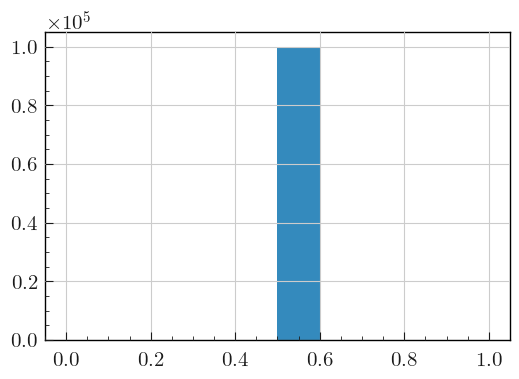

In [184]:
df_['rand'].hist()

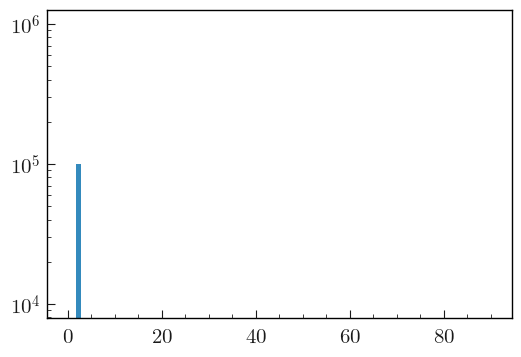

In [94]:
_=plt.hist(1.0/np.random.rand(, bins=100, range=(0,90) )
plt.yscale('log')

In [27]:
m = fake_pred_mask & passed
print( calc_livetime( df_[m]['weights']* df_[m]['fake_pred'], return_dict=True ) )

m = fake_pred_mask
print( calc_livetime( df_[m]['weights']* df_[m]['fake_pred'], return_dict=True ) )

{'R': 17.40202701229893, 'DeltaR2': 0.13547280258927086, 'DeltaR': 0.3680663018931112, 'livetime': 128.4540267839497, 'total_rate': 17.40202701229893+/-0.36807, 'ulivetime': 128.4540267839497+/-0.02115, 'N_eff': 2235.360443932863}
{'R': 48.33191875601832, 'DeltaR2': 0.22953160359767943, 'DeltaR': 0.47909456644558124, 'livetime': 210.56759940009826, 'total_rate': 48.33191875601832+/-0.47909, 'ulivetime': 210.56759940009826+/-0.00991, 'N_eff': 10177.13610685536}


Text(0.5, 0, 'pred')

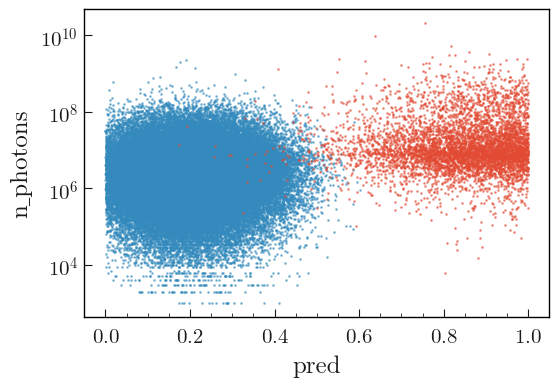

In [113]:
#plt.scatter(
d = df_.sample(100000)

fig, ax = plt.subplots()
d_ = d.query('filtered==0')
ax.scatter(d_.fake_pred, d_.n_photons, s=1, alpha=0.5, label='filtered==0')
d_ = d.query('filtered==1')
ax.scatter(d_.fake_pred, d_.n_photons, s=1, alpha=0.5, label='filtered==1')
ax.set_yscale('log')
ax.set_ylabel("n_photons")
ax.set_xlabel("pred")

Text(0.5, 0, 'pred')

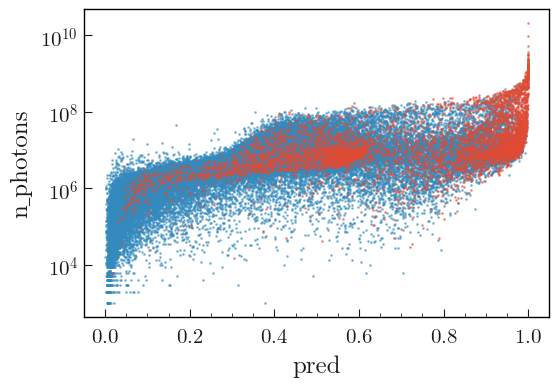

In [115]:
#plt.scatter(
d = df_.sample(100000)

fig, ax = plt.subplots()
d_ = d.query('filtered==0')
ax.scatter(d_.pred, d_.n_photons, s=1, alpha=0.5, label='filtered==0')
d_ = d.query('filtered==1')
ax.scatter(d_.pred, d_.n_photons, s=1, alpha=0.5, label='filtered==1')
ax.set_yscale('log')
ax.set_ylabel("n_photons")
ax.set_xlabel("pred")

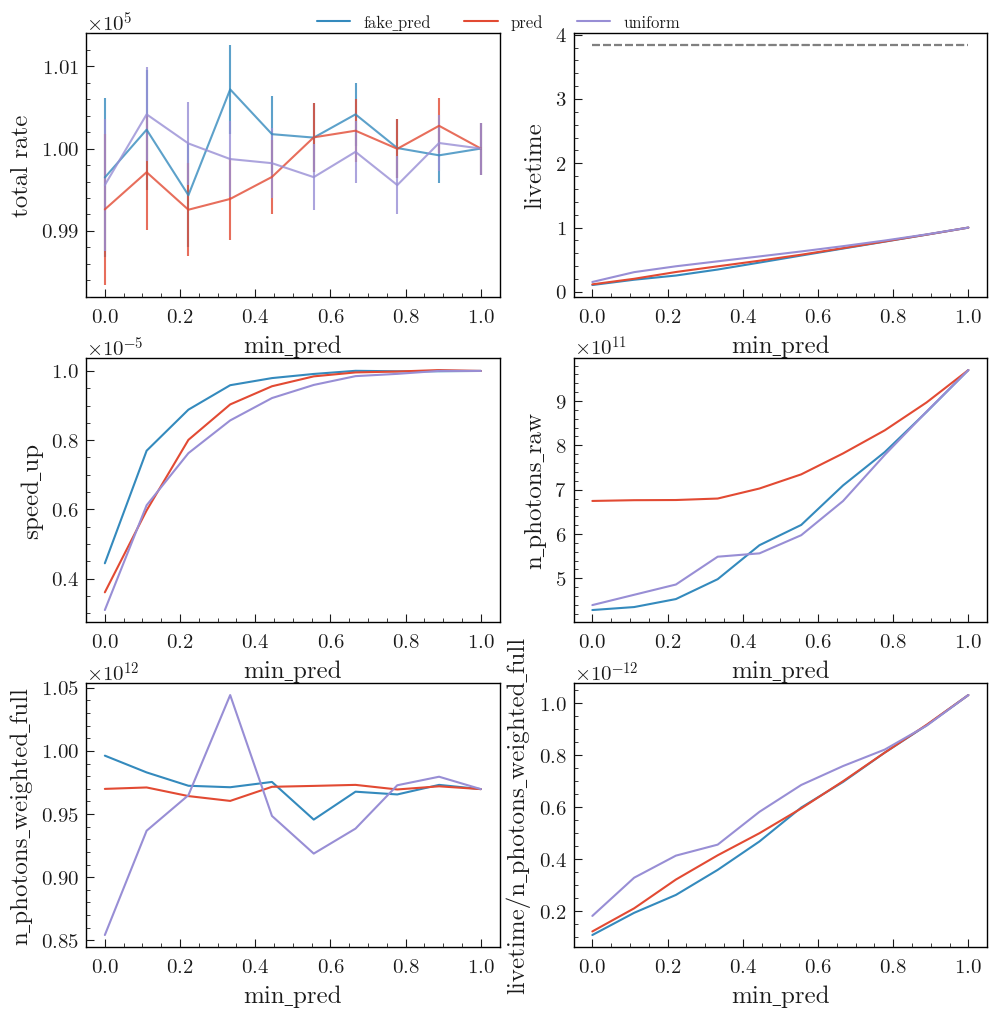

In [49]:
fig, axs = plt.subplots(ncols=2, nrows=3, squeeze=False, figsize=(10,10) )
fig.tight_layout(pad=1.2)
axs = axs.flatten()

for pred_name, sdf in sdfs.items():
    ax = axs[0]
    ax.errorbar( sdf['min_pred'], sdf['R'], yerr=sdf['DeltaR'], alpha=0.8)
    ax.set_xlabel("min_pred")
    ax.set_ylabel("total rate")
    
    ax = axs[1]
    x = 'min_pred'
    y = 'livetime'
    ax.plot( sdf[x], sdf[y] )
    ax.hlines(pred_livetime['livetime'], 0,1, color='gray', ls='--')
    ax.set_ylabel(y)
    ax.set_xlabel(x)
    
    
    # ax = axs[2]
    # x = 'min_pred'
    # #y = 'n_events_passed'
    # y = 'speed_up'
    # ax.plot( sdf[x], sdf[y]/len(df_) )
    # ax.set_ylabel(y)
    # #ax.set_ylabel('fraction of events passed')
    # ax.set_xlabel(x)

    ax = axs[2]
    x = 'min_pred'
    y = 'speed_up'
    ax.plot( sdf[x], sdf[y]/len(df_) )
    ax.set_ylabel(y)
    ax.set_xlabel(x)
    
    
    ax = axs[3]
    x = 'min_pred'
    y = 'n_photons_raw'
    ax.plot( sdf[x], sdf[y] )
    ax.set_ylabel(y)
    ax.set_xlabel(x)
    
    ax = axs[4]
    x = 'min_pred'
    y = 'n_photons_weighted_full'
    ax.plot( sdf[x], sdf[y] )
    ax.set_ylabel(y)
    ax.set_xlabel(x)
    

    
    ax = axs[5]
    x = 'min_pred'
    #y = 'n_photons_weighted_full'
    # ax.plot( sdf[x], sdf['livetime']/(sdf['cpu_time_s']) )
    ax.plot( sdf[x], sdf['livetime']/(sdf[y]), label=pred_name)
    ax.set_ylabel(f"livetime/{y}")
    ax.set_xlabel(x)

fig.legend(loc='upper center', ncol=len(sdfs))



Text(0.5, 0, '$N(photons)$')

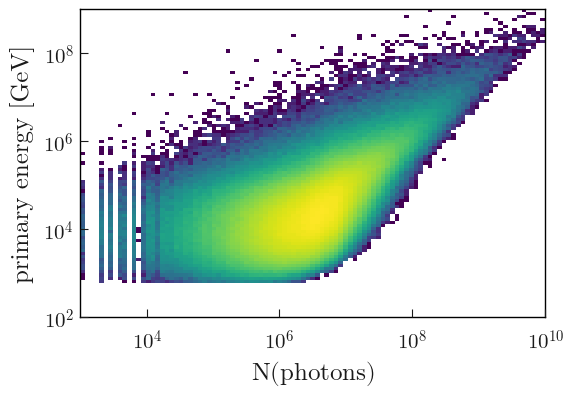

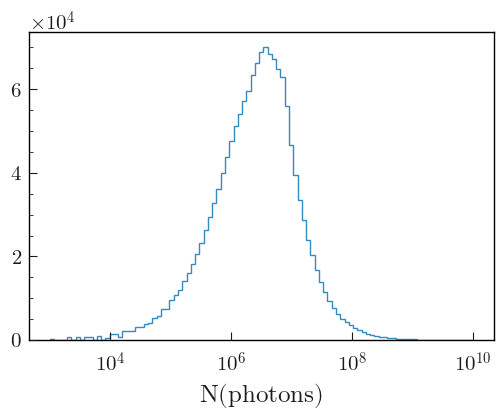

In [60]:
import matplotlib as mpl

#df = df_test.sample(frac=1)

n_photons_bins = plt.geomspace(1E3,1E10,100)

fig, ax = plt.subplots()
_ = ax.hist2d(df['n_photons'], df['energy'],
             bins=(
                 n_photons_bins,
                 plt.geomspace(1E2,1E9, 100),
             ),
               norm=mpl.colors.LogNorm())
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('$N(photons)$')
ax.set_ylabel("primary energy [GeV]")


fig, ax = plt.subplots()
hw = dict(histtype='step')
_ = ax.hist(df['n_photons'], bins=n_photons_bins, **hw)
ax.set_xscale('log')
ax.set_xlabel('$N(photons)$')



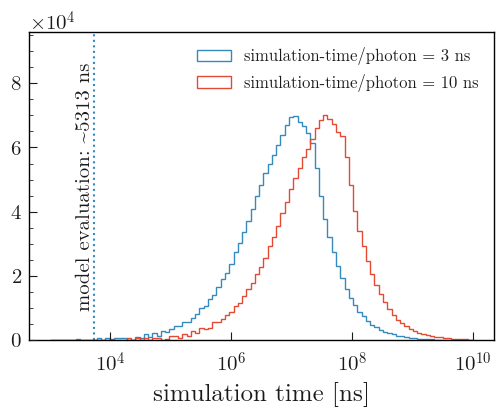

In [59]:
#evaluation_time = 3*1E-5
#evaluation_time_ns = evaluation_time * 1E9
#cputime_per_gamma = 3

fig, ax = plt.subplots()
hw = dict(histtype='step')
_ = ax.hist(df['n_photons']*3, bins=n_photons_bins, **hw, label=f"simulation-time/photon = 3 ns")
_ = ax.hist(df['n_photons']*10, bins=n_photons_bins, **hw, label=f"simulation-time/photon = 10 ns")
ax.set_ylim(0, ax.get_ylim()[1]*1.3)
ax.vlines(evaluation_time_ns, 0, ax.get_ylim()[-1], ls=':' )
ax.text(evaluation_time_ns, ax.get_ylim()[-1]*0.5, f'model evaluation: ~{evaluation_time_ns:.0f} ns', rotation=90, verticalalignment='center', horizontalalignment='right')
ax.set_xscale('log')
ax.set_xlabel('simulation time [ns]')

ax.legend()

(array([42303., 31852., 16013.,  3867.,   516.,   291.,   577.,  1099.,
         1563.,  1919.]),
 array([0.1       , 0.18999992, 0.27999985, 0.36999977, 0.45999969,
        0.54999961, 0.63999954, 0.72999946, 0.81999938, 0.90999931,
        0.99999923]),
 [<matplotlib.patches.Polygon at 0x7f2b6736f110>])

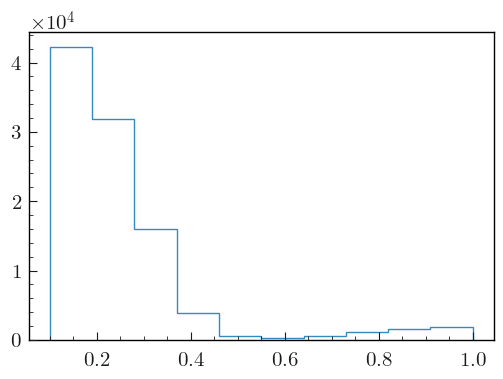

In [133]:
plt.hist(1.0/w, histtype='step')

/tmp/ipykernel_219/3927319072.py:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if weight_col and weight_col in df:


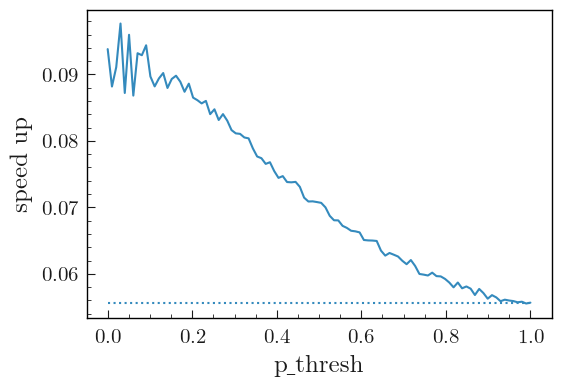

In [63]:
from IPython.display import display, Latex
# for i in range(3):
#     display(Latex(f'$x_{i}$'))
d = df
#get_weight_from_pred(w)
p = d['pred']
passed = d.truth == 1

p_thresh = 0.03
x = np.linspace(0,1,100)
vals = []
for p_thresh in x:
    p = np.where(p<=p_thresh, p_thresh, p)    
    w, m = get_weight_from_pred(p)    
    w = w[m & passed]
    l = calc_livetime(w, return_dict=True)
    n_eff = w.sum()**2/(w*w).sum()

    if False:
        print(f"""
        n_raw            = { len(w) }
        sum(w_i, passed) = { w[m].sum() }
        sum(p_i)         = { p.sum() }
        n_passed         = { m.sum() } 
        n_eff            = { n_eff } {l['N_eff']}
        speed_up         = { n_eff/m.sum() }         
        """)
        
    vals.append( n_eff/p.sum() )

fig, ax = plt.subplots()
ax.plot(x, vals)
ax.set_xlabel('p_thresh')
ax.set_ylabel('speed up')
ax.hlines( passed.sum()/len(passed), 0, 1, ls=':')



In [50]:

passed.sum()

5566

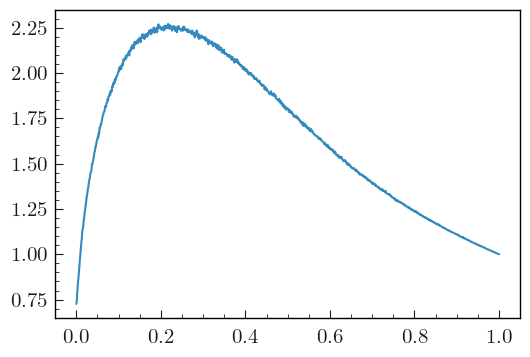

In [150]:

plt.plot(x, vals)


In [152]:
w = np.ones(9000)*1E-3

w.sum()

9.000000000000004